In [2]:
# DSC640
# Weeks 11 & 12
# Term Project: Milestone 5
# Author: Nathanael Ochoa
# 11/17/2024

# Term Project - Milestone 5

In [3]:
# Import necessary packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
# Read excel files
path = 'D:/DSC640Datasets/Term Project/nationaldatabaseofchildcareprices.xlsx'
data = pd.read_excel(path)

In [5]:
# Data frame shape
print(f"data shape: {data.shape}")

data shape: (34567, 227)


In [6]:
data.dropna(inplace = True)

In [7]:
# Data frame shape
print(f"data shape: {data.shape}")

data shape: (23342, 227)


In [8]:
# Preview some of the data
data.head()

State_Name State_Abbreviation     County_Name  County_FIPS_Code  StudyYear  \
0    Alabama                 AL  Autauga County              1001       2008   
1    Alabama                 AL  Autauga County              1001       2009   
2    Alabama                 AL  Autauga County              1001       2010   
3    Alabama                 AL  Autauga County              1001       2011   
4    Alabama                 AL  Autauga County              1001       2012   

   UNR_16  FUNR_16  MUNR_16  UNR_20to64  FUNR_20to64  ...  MFCCToddler  \
0    5.42     4.41     6.32         4.6          3.5  ...        83.45   
1    5.93     5.72     6.11         4.8          4.6  ...        87.39   
2    6.21     5.57     6.78         5.1          4.6  ...        91.33   
3    7.55     8.13     7.03         6.2          6.3  ...        95.28   
4    8.60     8.88     8.29         6.7          6.4  ...        99.22   

   MFCCToddler_flag  MFCCPreschool  MFCCPreschool_flag  _75FCCInfant  \
0               3.0          81.40                 1.0          97.4   
1               3.0          85.68                 1.0         102.0   
2               3.0          89.96                 1.0         106.6   
3               3.0          94.25                 1.0         111.2   
4               3.0          98.53                 1.0         115.8   

   _75FCCInfant_flag  _75FCCToddler  _75FCCToddler_flag  _75FCCPreschool  \
0                1.0           97.4                 3.0             95.0   
1                1.0          102.0                 3.0            100.0   
2                1.0          106.6                 3.0            105.0   
3                1.0          111.2                 3.0            110.0   
4                1.0          115.8                 3.0            115.0   

   _75FCCPreschool_flag  
0                   1.0  
1                   1.0  
2                   1.0  
3                   1.0  
4                   1.0  

[5 rows x 227 columns]

In [9]:
# View states that are in this dataset
data['State_Name'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming'], dtype=object)

I've reviewed the [data's documentation](https://www.dol.gov/sites/dolgov/files/WB/media/NationalDatabaseofChildcarePricesTechnicalGuideFinal.pdf) and decided to pursue a business-focused approach for my term project. As an analyst for an established childcare company, I am tasked with identifying potential markets for growth and expansion. 

To begin, I’ll remove columns that, while important, are not necessary for this specific analysis

In [10]:
# Identify columns to exclude
columns_to_exclude = [col for col in data.columns if col.startswith('_75') or 
                      col.startswith('i') or 
                      col.endswith('_flag') or 
                      col in ['MCBto5', 'MC6to11', 'MC12to17', 'MC18to23', 'MC24to29', 
                              'MC30to35', 'MC36to41', 'MC42to47', 'MC48to53', 
                              'MFCCBto5', 'MFCC6to11', 'MFCC12to17', 'MFCC18to23', 
                              'MFCC24to29', 'MFCC30to35', 'MFCC36to41', 'MFCC42to47',
                             'MFCC48to53']]

In [11]:
# Create a new DataFrame without the excluded columns
new_df = data.drop(columns=columns_to_exclude)

In [12]:
# This will be the 'main' dataset that I will using
new_df.head()

State_Name State_Abbreviation     County_Name  County_FIPS_Code  StudyYear  \
0    Alabama                 AL  Autauga County              1001       2008   
1    Alabama                 AL  Autauga County              1001       2009   
2    Alabama                 AL  Autauga County              1001       2010   
3    Alabama                 AL  Autauga County              1001       2011   
4    Alabama                 AL  Autauga County              1001       2012   

   UNR_16  FUNR_16  MUNR_16  UNR_20to64  FUNR_20to64  ...  MC54toSA   MCSA  \
0    5.42     4.41     6.32         4.6          3.5  ...     85.92  80.92   
1    5.93     5.72     6.11         4.8          4.6  ...     87.59  83.42   
2    6.21     5.57     6.78         5.1          4.6  ...     89.26  85.92   
3    7.55     8.13     7.03         6.2          6.3  ...     90.93  88.43   
4    8.60     8.88     8.29         6.7          6.4  ...     92.60  90.93   

   MFCC54toSA  MFCCSA  MCInfant  MCToddler  MCPreschool  MFCCInfant  \
0       81.40   81.40    104.95     104.95        85.92       83.45   
1       85.68   85.68    105.11     105.11        87.59       87.39   
2       89.96   89.96    105.28     105.28        89.26       91.33   
3       94.25   94.25    105.45     105.45        90.93       95.28   
4       98.53   98.53    105.61     105.61        92.60       99.22   

   MFCCToddler  MFCCPreschool  
0        83.45          81.40  
1        87.39          85.68  
2        91.33          89.96  
3        95.28          94.25  
4        99.22          98.53  

[5 rows x 70 columns]

In [13]:
# Data frame shape
print(f"new_df shape: {new_df.shape}")

new_df shape: (23342, 70)


Next, I will preview the financial data from the *new_df* DataFrame.

In [14]:
# Create a dataframe that contains necessary financial variables
weekly_cost = new_df.copy()[['State_Abbreviation', 'County_Name', 'StudyYear', 
                             'MCInfant', 'MCToddler', 'MCPreschool', 'MC54toSA', 
                             'MCSA', 'MFCCInfant', 'MFCCToddler', 'MFCCPreschool', 
                             'MFCC54toSA', 'MFCCSA']]

In [15]:
# Data frame shape
print(f"weekly_cost shape: {weekly_cost.shape}")

weekly_cost shape: (23342, 13)


In [16]:
# View first County's cycle (2008-2018) in the dataset
weekly_cost.head(11)

State_Abbreviation     County_Name  StudyYear  MCInfant  MCToddler  \
0                  AL  Autauga County       2008    104.95     104.95   
1                  AL  Autauga County       2009    105.11     105.11   
2                  AL  Autauga County       2010    105.28     105.28   
3                  AL  Autauga County       2011    105.45     105.45   
4                  AL  Autauga County       2012    105.61     105.61   
5                  AL  Autauga County       2013    105.78     105.78   
6                  AL  Autauga County       2014    105.95     105.95   
7                  AL  Autauga County       2015    109.56     109.56   
8                  AL  Autauga County       2016    113.18     113.18   
9                  AL  Autauga County       2017    116.79     116.79   
10                 AL  Autauga County       2018    120.41     120.41   

    MCPreschool  MC54toSA   MCSA  MFCCInfant  MFCCToddler  MFCCPreschool  \
0         85.92     85.92  80.92       83.45        83.45          81.40   
1         87.59     87.59  83.42       87.39        87.39          85.68   
2         89.26     89.26  85.92       91.33        91.33          89.96   
3         90.93     90.93  88.43       95.28        95.28          94.25   
4         92.60     92.60  90.93       99.22        99.22          98.53   
5         94.27     94.27  93.43      103.16       103.16         102.82   
6         95.94     95.94  95.94      107.10       107.10         107.10   
7         97.33     97.33  95.94      107.10       107.10         106.81   
8         98.72     98.72  95.94      107.10       107.10         106.53   
9        100.11    100.11  95.94      107.10       107.10         106.24   
10       101.50    101.50  95.94      107.10       107.10         105.96   

    MFCC54toSA  MFCCSA  
0        81.40   81.40  
1        85.68   85.68  
2        89.96   89.96  
3        94.25   94.25  
4        98.53   98.53  
5       102.82  102.82  
6       107.10  107.10  
7       106.81  106.53  
8       106.53  105.96  
9       106.24  105.39  
10      105.96  104.81

The demographic data will still be utilized, but this DataFrame will streamline the financial portion of the dataset, making it easier to analyze.

**Guide:**

**Below are all weekly median price**

*Center-Based Care*
* MCInfant:    0-23 months
* MCToddler:   24-35 months
* MCPreschool: 36-54 months
* MC54toSA:    54m-school age
* MCSA:        school age

*Family Childcare*
* MFCCInfant: 0-23 months
* MFCCToddler: 24-35 months
* MFCCPreschool: 36-54 months
* MFCC54toSA:	54m-school age
* MFCCSA: school age

In [17]:
# Number of different counties in the data
len(weekly_cost['County_Name'].unique())

1779

In [18]:
# Calculate delta of each column
# Step 1: Group by County and State, then get the first and last available prices
grouped = weekly_cost.groupby(['State_Abbreviation', 'County_Name']).agg(
    start_year=('StudyYear', 'min'),
    end_year=('StudyYear', 'max'),
    MCInfant_start=('MCInfant', 'first'),
    MCInfant_end=('MCInfant', 'last'),
    MCToddler_start=('MCToddler', 'first'),
    MCToddler_end=('MCToddler', 'last'),
    MCPreschool_start=('MCPreschool', 'first'),
    MCPreschool_end=('MCPreschool', 'last'),
    MC54toSA_start=('MC54toSA', 'first'),
    MC54toSA_end=('MC54toSA', 'last'),
    MCSA_start=('MCSA', 'first'),
    MCSA_end=('MCSA', 'last'),
    MFCCInfant_start=('MFCCInfant', 'first'),
    MFCCInfant_end=('MFCCInfant', 'last'),
    MFCCToddler_start=('MFCCToddler', 'first'),
    MFCCToddler_end=('MFCCToddler', 'last'),
    MFCCPreschool_start=('MFCCPreschool', 'first'),
    MFCCPreschool_end=('MFCCPreschool', 'last'),
    MFCC54toSA_start=('MFCC54toSA', 'first'),
    MFCC54toSA_end=('MFCC54toSA', 'last'),
    MFCCSA_start=('MFCCSA', 'first'),
    MFCCSA_end=('MFCCSA', 'last')
).reset_index()

# Step 2: Calculate the delta for each price category
for column in ['MCInfant', 'MCToddler', 'MCPreschool', 'MC54toSA', 'MCSA', 
               'MFCCInfant', 'MFCCToddler', 'MFCCPreschool', 'MFCC54toSA', 'MFCCSA']:
    grouped[f"{column}_delta"] = grouped[f"{column}_end"] - grouped[f"{column}_start"]

In [19]:
grouped.head(1).stack()

0  State_Abbreviation                         AK
   County_Name            Anchorage Municipality
   start_year                               2014
   end_year                                 2018
   MCInfant_start                         211.04
   MCInfant_end                           239.19
   MCToddler_start                        188.08
   MCToddler_end                          229.62
   MCPreschool_start                      181.73
   MCPreschool_end                        193.27
   MC54toSA_start                         181.73
   MC54toSA_end                           193.27
   MCSA_start                             203.08
   MCSA_end                               203.08
   MFCCInfant_start                       164.42
   MFCCInfant_end                         175.96
   MFCCToddler_start                      159.81
   MFCCToddler_end                        162.12
   MFCCPreschool_start                     150.0
   MFCCPreschool_end                       150.0
   MFCC54toSA_start 

In [20]:
# Save only the delta columns to a new data frame
cost_delta = grouped[['State_Abbreviation', 'County_Name', 'start_year', 'end_year', 'MCInfant_delta', 'MCToddler_delta', 
                      'MCPreschool_delta', 'MC54toSA_delta', 'MCSA_delta', 'MFCCInfant_delta', 'MFCCToddler_delta',
                      'MFCCPreschool_delta', 'MFCC54toSA_delta', 'MFCCSA_delta']]

In [21]:
# Preview data frame
cost_delta.head()

State_Abbreviation                   County_Name  start_year  end_year  \
0                 AK        Anchorage Municipality        2014      2018   
1                 AK  Fairbanks North Star Borough        2015      2015   
2                 AK       Juneau City and Borough        2015      2015   
3                 AK       Kenai Peninsula Borough        2015      2015   
4                 AK     Ketchikan Gateway Borough        2015      2015   

   MCInfant_delta  MCToddler_delta  MCPreschool_delta  MC54toSA_delta  \
0           28.15            41.54              11.54           11.54   
1            0.00             0.00               0.00            0.00   
2            0.00             0.00               0.00            0.00   
3            0.00             0.00               0.00            0.00   
4            0.00             0.00               0.00            0.00   

   MCSA_delta  MFCCInfant_delta  MFCCToddler_delta  MFCCPreschool_delta  \
0         0.0             11.54               2.31                  0.0   
1         0.0              0.00               0.00                  0.0   
2         0.0              0.00               0.00                  0.0   
3         0.0              0.00               0.00                  0.0   
4         0.0              0.00               0.00                  0.0   

   MFCC54toSA_delta  MFCCSA_delta  
0               0.0         12.23  
1               0.0          0.00  
2               0.0          0.00  
3               0.0          0.00  
4               0.0          0.00

In [22]:
# Sum up all deltas and select top 10 counties to begin analysis
# Step 1: Calculate the total delta
cost_delta.loc[:, 'Total_delta'] = cost_delta[['MCInfant_delta', 'MCToddler_delta', 
                                         'MCPreschool_delta', 'MC54toSA_delta', 
                                         'MCSA_delta', 'MFCCInfant_delta', 
                                         'MFCCToddler_delta', 'MFCCPreschool_delta', 
                                         'MFCC54toSA_delta', 'MFCCSA_delta']].sum(axis=1)

# Step 2: Sort the DataFrame by Total Delta in descending order
sorted_cost_delta = cost_delta.sort_values(by='Total_delta', ascending=False)

# Step 3: Select top counties for analysis (e.g., top 10 counties)
top_counties = sorted_cost_delta.head(10)

# Reset the index of the top_counties DataFrame
top_counties.reset_index(drop = True, inplace = True)

C:\Users\natha\AppData\Local\Temp\ipykernel_13920\2254117139.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cost_delta.loc[:, 'Total_delta'] = cost_delta[['MCInfant_delta', 'MCToddler_delta',


In [23]:
# Preview states, counties, start and end years, total delta columns
top_counties[['State_Abbreviation', 'County_Name', 'start_year', 'end_year', 'Total_delta']]

State_Abbreviation           County_Name  start_year  end_year  Total_delta
0                 WY          Teton County        2014      2018      1668.91
1                 WA           King County        2008      2018      1165.20
2                 NJ      Hunterdon County        2008      2018      1092.92
3                 CA  San Francisco County        2008      2018      1028.55
4                 CT      Fairfield County        2008      2018      1022.50
5                 VA      Arlington County        2009      2018      1019.50
6                 VT        Windham County        2008      2018       950.61
7                 VA       Alexandria city        2009      2018       918.00
8                 CA        Alameda County        2008      2018       810.52
9                 VA    Manassas Park city        2009      2018       802.50

Now let's go back and select these counties in our data frames from before (*new_df* and *weekly_cost*).

In [24]:
# Filter for the above counties
# Create copies
new_df_copy = new_df.copy()
weekly_cost_copy = weekly_cost.copy()

# Create a list of top counties to filter
top_counties_list = [
    ('WY', 'Teton County'),
    ('WA', 'King County'),
    ('NJ', 'Hunterdon County'),
    ('CA', 'San Francisco County'),
    ('CT', 'Fairfield County'),
    ('VA', 'Arlington County'),
    ('VT', 'Windham County'),
    ('VA', 'Alexandria city'),
    ('CA', 'Alameda County'),
    ('VA', 'Manassas Park city')
]

# Filter the DataFrame based on the top counties
top_counties = new_df_copy[new_df_copy.apply(
    lambda row: (row['State_Abbreviation'], row['County_Name']) in top_counties_list, axis=1
)]

tc_weekly_cost = weekly_cost_copy[weekly_cost_copy.apply(
    lambda row: (row['State_Abbreviation'], row['County_Name']) in top_counties_list, axis=1
)]

In [25]:
# Preview top_counties
top_counties

State_Name State_Abbreviation     County_Name  County_FIPS_Code  \
2045   California                 CA  Alameda County              6001   
2046   California                 CA  Alameda County              6001   
2047   California                 CA  Alameda County              6001   
2048   California                 CA  Alameda County              6001   
2049   California                 CA  Alameda County              6001   
...           ...                ...             ...               ...   
34529     Wyoming                 WY    Teton County             56039   
34530     Wyoming                 WY    Teton County             56039   
34531     Wyoming                 WY    Teton County             56039   
34532     Wyoming                 WY    Teton County             56039   
34533     Wyoming                 WY    Teton County             56039   

       StudyYear  UNR_16  FUNR_16  MUNR_16  UNR_20to64  FUNR_20to64  ...  \
2045        2008    6.60     6.57     6.63         6.1          6.1  ...   
2046        2009    7.71     7.53     7.86         7.2          7.1  ...   
2047        2010    8.50     8.24     8.73         7.9          7.7  ...   
2048        2011    9.21     8.87     9.51         8.7          8.4  ...   
2049        2012    9.91     9.68    10.12         9.3          9.2  ...   
...          ...     ...      ...      ...         ...          ...  ...   
34529       2014    3.60     3.03     4.06         3.5          2.5  ...   
34530       2015    2.61     2.19     2.95         2.6          2.1  ...   
34531       2016    2.12     1.76     2.43         2.0          1.6  ...   
34532       2017    1.27     0.96     1.52         0.9          0.4  ...   
34533       2018    1.45     0.97     1.81         1.1          0.5  ...   

       MC54toSA    MCSA  MFCC54toSA  MFCCSA  MCInfant  MCToddler  MCPreschool  \
2045     214.22  154.83      178.26  144.21    301.77     214.22       214.22   
2046     234.23  169.31      178.56  146.01    312.76     234.23       234.23   
2047     234.95  182.19      181.19  139.50    313.14     234.95       234.95   
2048     235.68  195.06      183.83  132.99    313.53     235.68       235.68   
2049     236.40  207.94      186.46  126.48    313.91     236.40       236.40   
...         ...     ...         ...     ...       ...        ...          ...   
34529    184.96  147.57      172.69  184.07    218.59     184.96       184.96   
34530    184.96  147.57      172.69  172.69    218.59     184.96       184.96   
34531    242.64  261.49      225.58  161.32    278.74     245.25       242.64   
34532    300.32  375.40      278.46  149.94    338.90     305.53       300.32   
34533    358.00  375.40      331.34  138.56    399.06     365.82       358.00   

       MFCCInfant  MFCCToddler  MFCCPreschool  
2045       192.32       178.26         178.26  
2046       199.98       178.56         178.56  
2047       201.32       181.19         181.19  
2048       202.66       183.83         183.83  
2049       204.00       186.46         186.46  
...           ...          ...            ...  
34529      172.69       172.69         172.69  
34530      172.69       172.69         172.69  
34531      261.99       240.57         225.58  
34532      351.29       308.45         278.46  
34533      430.94       376.32         331.34  

[94 rows x 70 columns]

In [26]:
# Preview tc_weekly_cost
tc_weekly_cost

State_Abbreviation     County_Name  StudyYear  MCInfant  MCToddler  \
2045                  CA  Alameda County       2008    301.77     214.22   
2046                  CA  Alameda County       2009    312.76     234.23   
2047                  CA  Alameda County       2010    313.14     234.95   
2048                  CA  Alameda County       2011    313.53     235.68   
2049                  CA  Alameda County       2012    313.91     236.40   
...                  ...             ...        ...       ...        ...   
34529                 WY    Teton County       2014    218.59     184.96   
34530                 WY    Teton County       2015    218.59     184.96   
34531                 WY    Teton County       2016    278.74     245.25   
34532                 WY    Teton County       2017    338.90     305.53   
34533                 WY    Teton County       2018    399.06     365.82   

       MCPreschool  MC54toSA    MCSA  MFCCInfant  MFCCToddler  MFCCPreschool  \
2045        214.22    214.22  154.83      192.32       178.26         178.26   
2046        234.23    234.23  169.31      199.98       178.56         178.56   
2047        234.95    234.95  182.19      201.32       181.19         181.19   
2048        235.68    235.68  195.06      202.66       183.83         183.83   
2049        236.40    236.40  207.94      204.00       186.46         186.46   
...            ...       ...     ...         ...          ...            ...   
34529       184.96    184.96  147.57      172.69       172.69         172.69   
34530       184.96    184.96  147.57      172.69       172.69         172.69   
34531       242.64    242.64  261.49      261.99       240.57         225.58   
34532       300.32    300.32  375.40      351.29       308.45         278.46   
34533       358.00    358.00  375.40      430.94       376.32         331.34   

       MFCC54toSA  MFCCSA  
2045       178.26  144.21  
2046       178.56  146.01  
2047       181.19  139.50  
2048       183.83  132.99  
2049       186.46  126.48  
...           ...     ...  
34529      172.69  184.07  
34530      172.69  172.69  
34531      225.58  161.32  
34532      278.46  149.94  
34533      331.34  138.56  

[94 rows x 13 columns]

# MCInfant vs. MFCCInfant

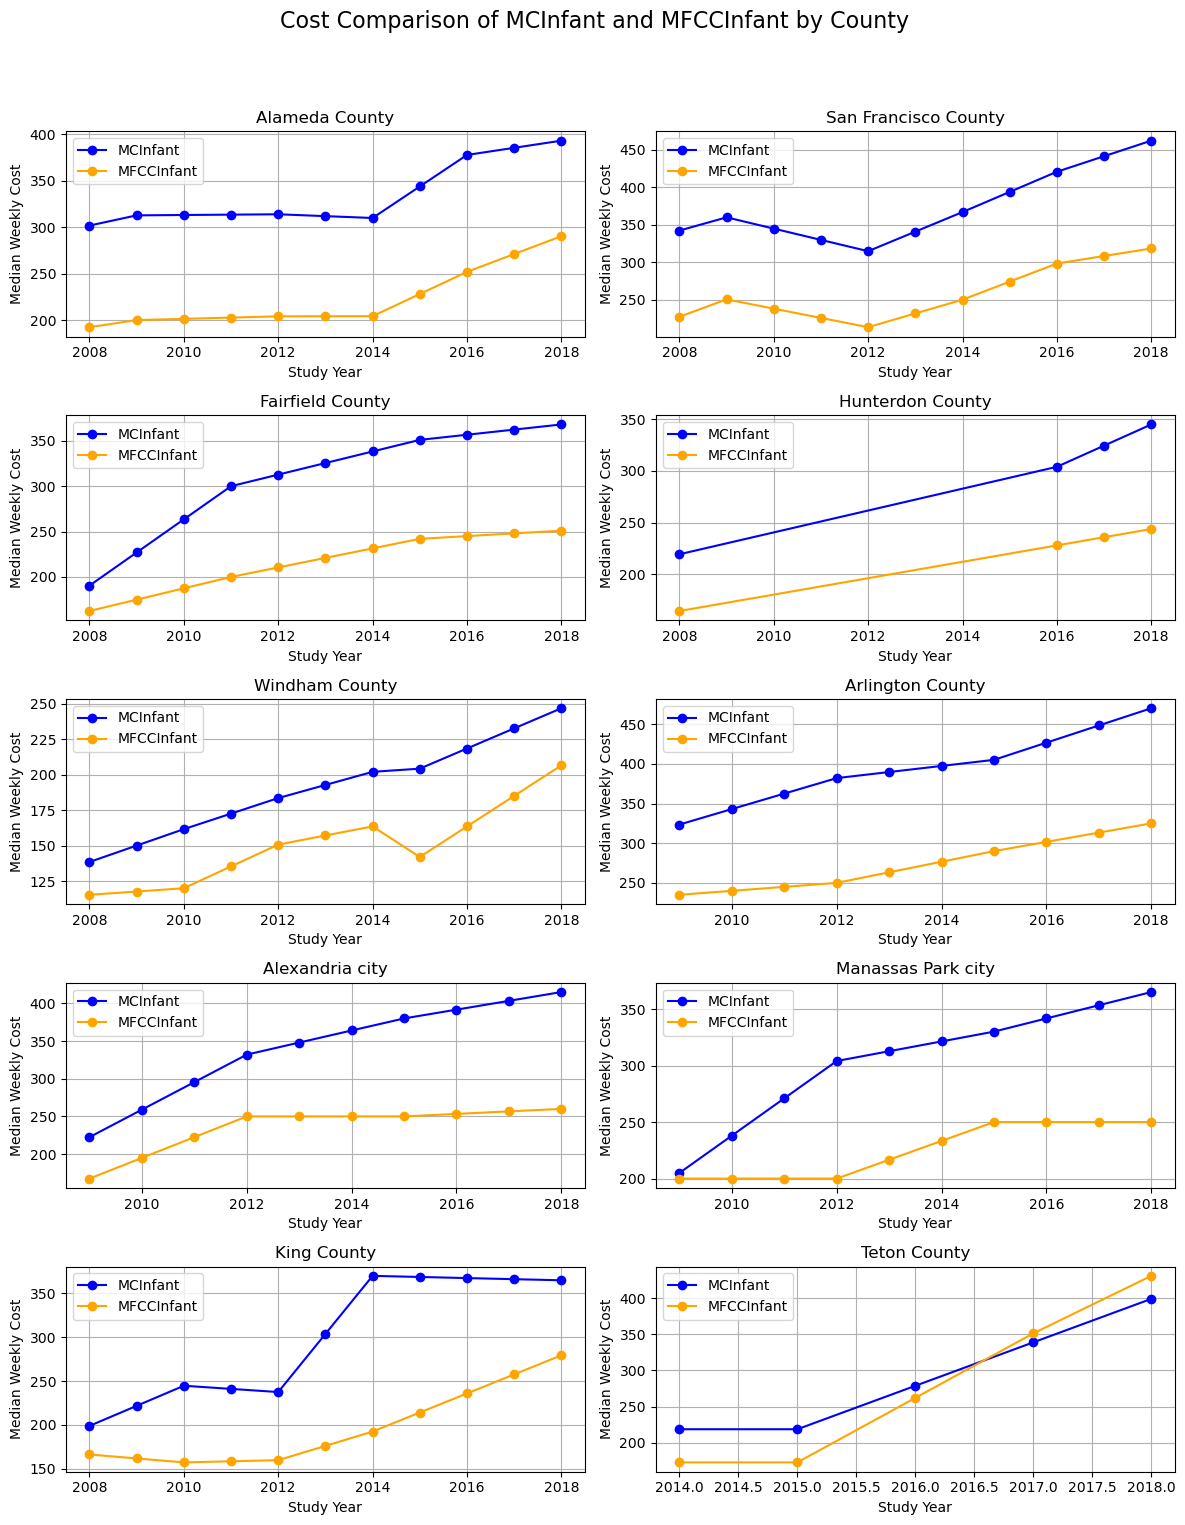

In [27]:
# Define the pair to plot
pair_to_plot = ('MCInfant', 'MFCCInfant')

# Get unique counties
counties = tc_weekly_cost['County_Name'].unique()

# Create the plot grid with 2 columns and adjust figsize for larger height
num_counties = len(counties)
fig, axes = plt.subplots(nrows=(num_counties + 1) // 2, ncols=2, figsize=(12, 16))
fig.suptitle(f'Cost Comparison of {pair_to_plot[0]} and {pair_to_plot[1]} by County', fontsize=16)

for i, county in enumerate(counties):
    # Filter data for the specific county
    df_county = tc_weekly_cost[tc_weekly_cost['County_Name'] == county]

    row = i // 2
    col = i % 2

    axes[row, col].plot(df_county['StudyYear'], df_county[pair_to_plot[0]], marker='o', label=pair_to_plot[0], color='blue')
    axes[row, col].plot(df_county['StudyYear'], df_county[pair_to_plot[1]], marker='o', label=pair_to_plot[1], color='orange')

    axes[row, col].set_title(county)
    axes[row, col].set_xlabel('Study Year')
    axes[row, col].set_ylabel('Median Weekly Cost')
    axes[row, col].grid(True)
    axes[row, col].legend()

# Hide any empty subplots (if the number of counties is not a multiple of 2)
for j in range(num_counties, 2 * ((num_counties + 1) // 2)):
    axes[j // 2, j % 2].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure as a PNG image
plt.savefig('MCInfantvMFCCInfant.png', format='png')

# Show plot
plt.show()

# MCToddler vs. MFCCToddler

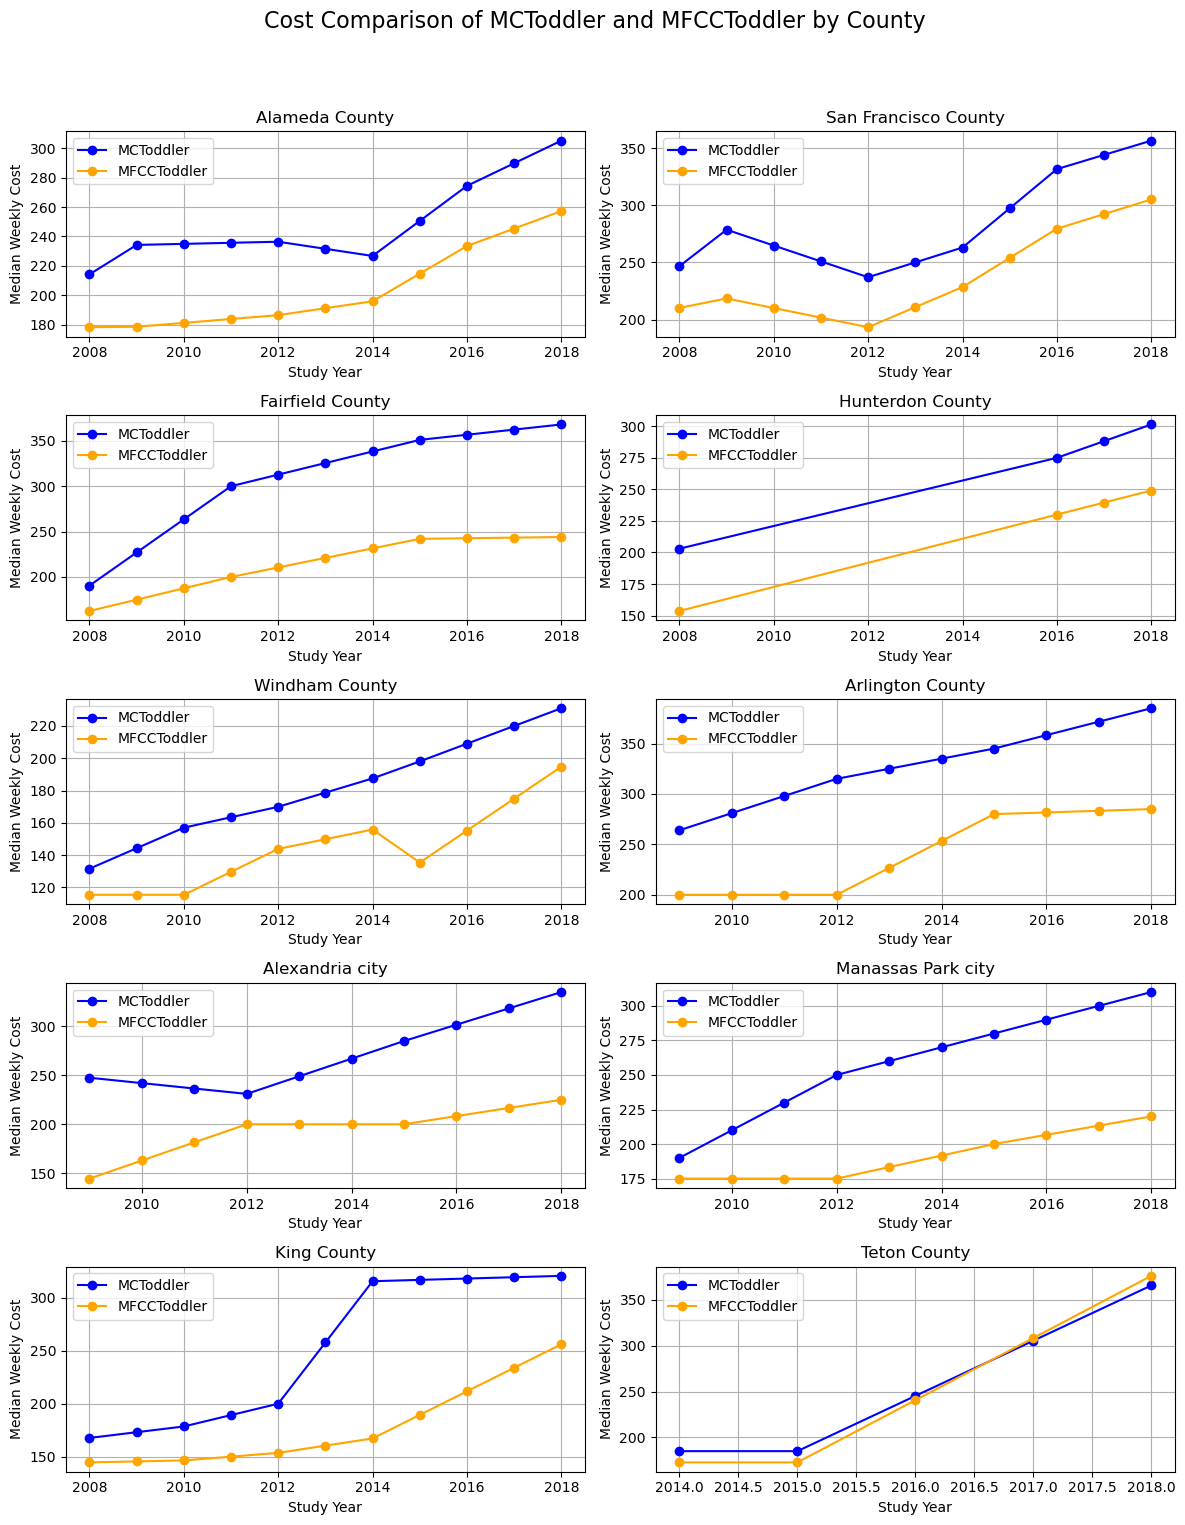

In [28]:
# Define the pair to plot
pair_to_plot = ('MCToddler', 'MFCCToddler')

# Get unique counties
counties = tc_weekly_cost['County_Name'].unique()

# Create the plot grid with 2 columns and adjust figsize for larger height
num_counties = len(counties)
fig, axes = plt.subplots(nrows=(num_counties + 1) // 2, ncols=2, figsize=(12, 16))
fig.suptitle(f'Cost Comparison of {pair_to_plot[0]} and {pair_to_plot[1]} by County', fontsize=16)

for i, county in enumerate(counties):
    # Filter data for the specific county
    df_county = tc_weekly_cost[tc_weekly_cost['County_Name'] == county]

    row = i // 2
    col = i % 2

    axes[row, col].plot(df_county['StudyYear'], df_county[pair_to_plot[0]], marker='o', label=pair_to_plot[0], color='blue')
    axes[row, col].plot(df_county['StudyYear'], df_county[pair_to_plot[1]], marker='o', label=pair_to_plot[1], color='orange')

    axes[row, col].set_title(county)
    axes[row, col].set_xlabel('Study Year')
    axes[row, col].set_ylabel('Median Weekly Cost')
    axes[row, col].grid(True)
    axes[row, col].legend()

# Hide any empty subplots (if the number of counties is not a multiple of 2)
for j in range(num_counties, 2 * ((num_counties + 1) // 2)):
    axes[j // 2, j % 2].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure as a PNG image
plt.savefig('MCToddlervMFCCToddler.png', format='png')

# Show plot
plt.show()

# MCPreschool vs. MFCCPreschool

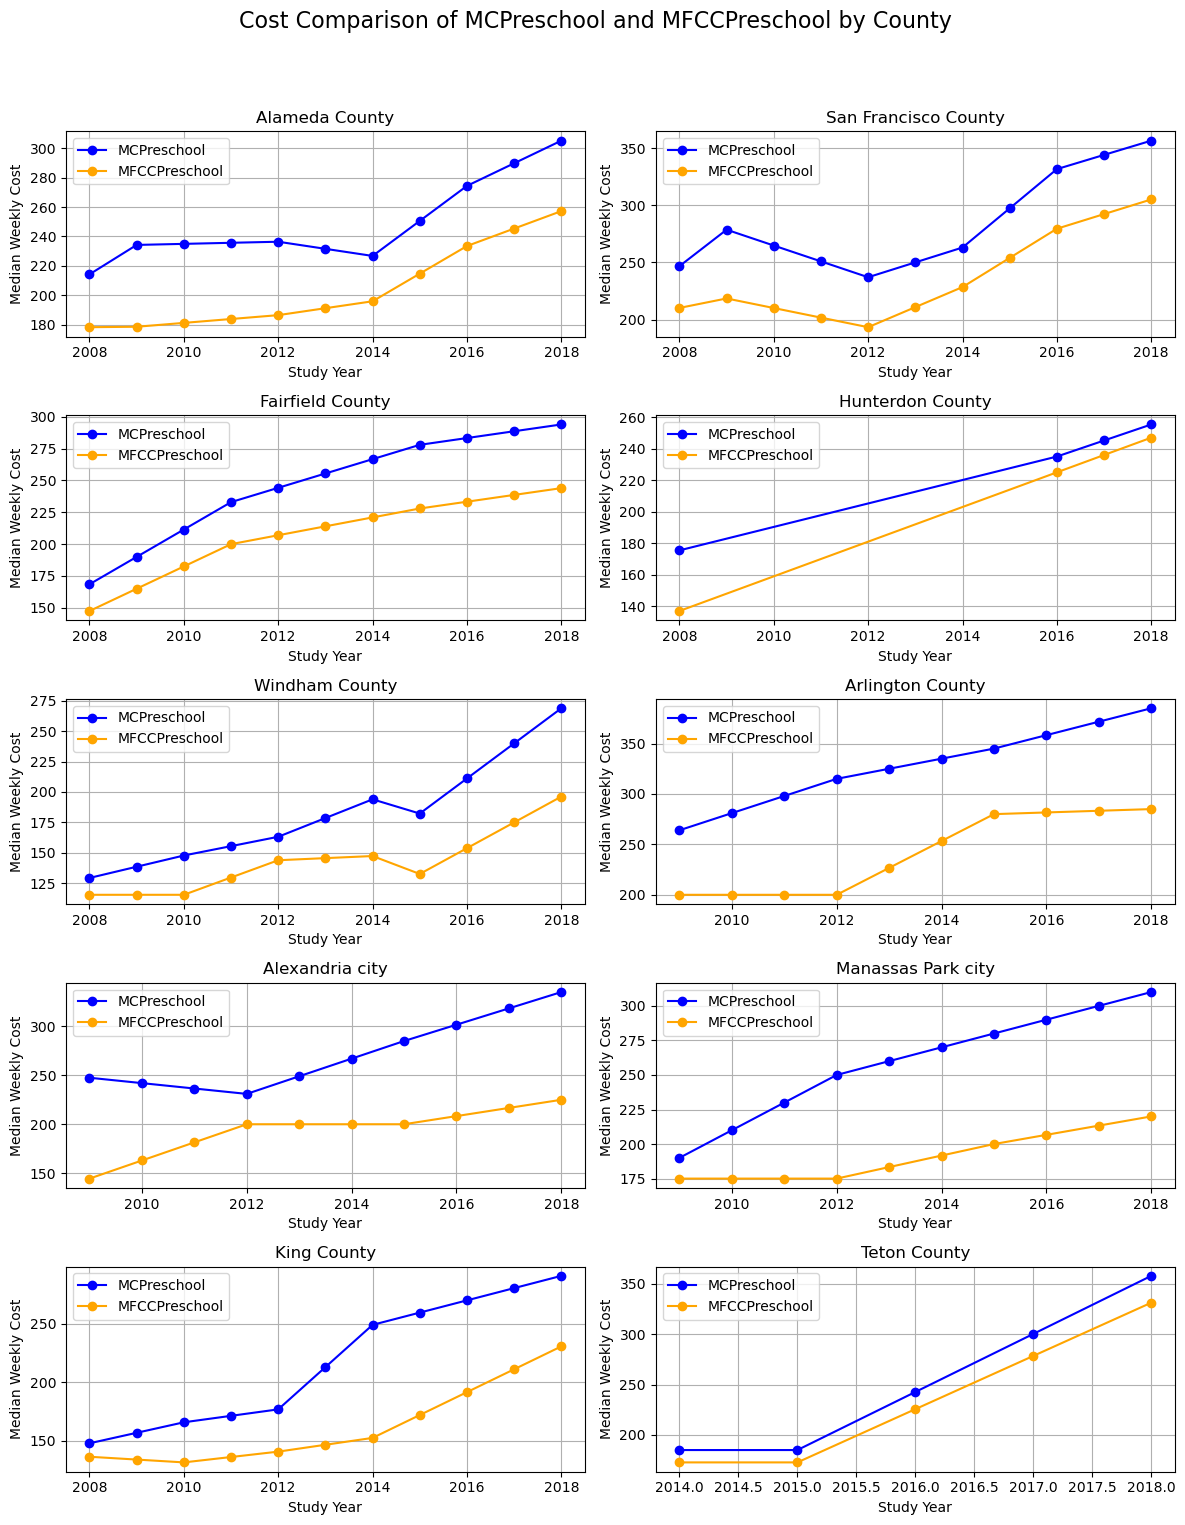

In [29]:
# Define the pair to plot
pair_to_plot = ('MCPreschool', 'MFCCPreschool')

# Get unique counties
counties = tc_weekly_cost['County_Name'].unique()

# Create the plot grid with 2 columns and adjust figsize for larger height
num_counties = len(counties)
fig, axes = plt.subplots(nrows=(num_counties + 1) // 2, ncols=2, figsize=(12, 16))
fig.suptitle(f'Cost Comparison of {pair_to_plot[0]} and {pair_to_plot[1]} by County', fontsize=16)

for i, county in enumerate(counties):
    # Filter data for the specific county
    df_county = tc_weekly_cost[tc_weekly_cost['County_Name'] == county]

    row = i // 2
    col = i % 2

    axes[row, col].plot(df_county['StudyYear'], df_county[pair_to_plot[0]], marker='o', label=pair_to_plot[0], color='blue')
    axes[row, col].plot(df_county['StudyYear'], df_county[pair_to_plot[1]], marker='o', label=pair_to_plot[1], color='orange')

    axes[row, col].set_title(county)
    axes[row, col].set_xlabel('Study Year')
    axes[row, col].set_ylabel('Median Weekly Cost')
    axes[row, col].grid(True)
    axes[row, col].legend()

# Hide any empty subplots (if the number of counties is not a multiple of 2)
for j in range(num_counties, 2 * ((num_counties + 1) // 2)):
    axes[j // 2, j % 2].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure as a PNG image
plt.savefig('MCPreschoolvMFCCPreschool.png', format='png')

# Show plot
plt.show()

# MC54toSA vs. MFCC54toSA

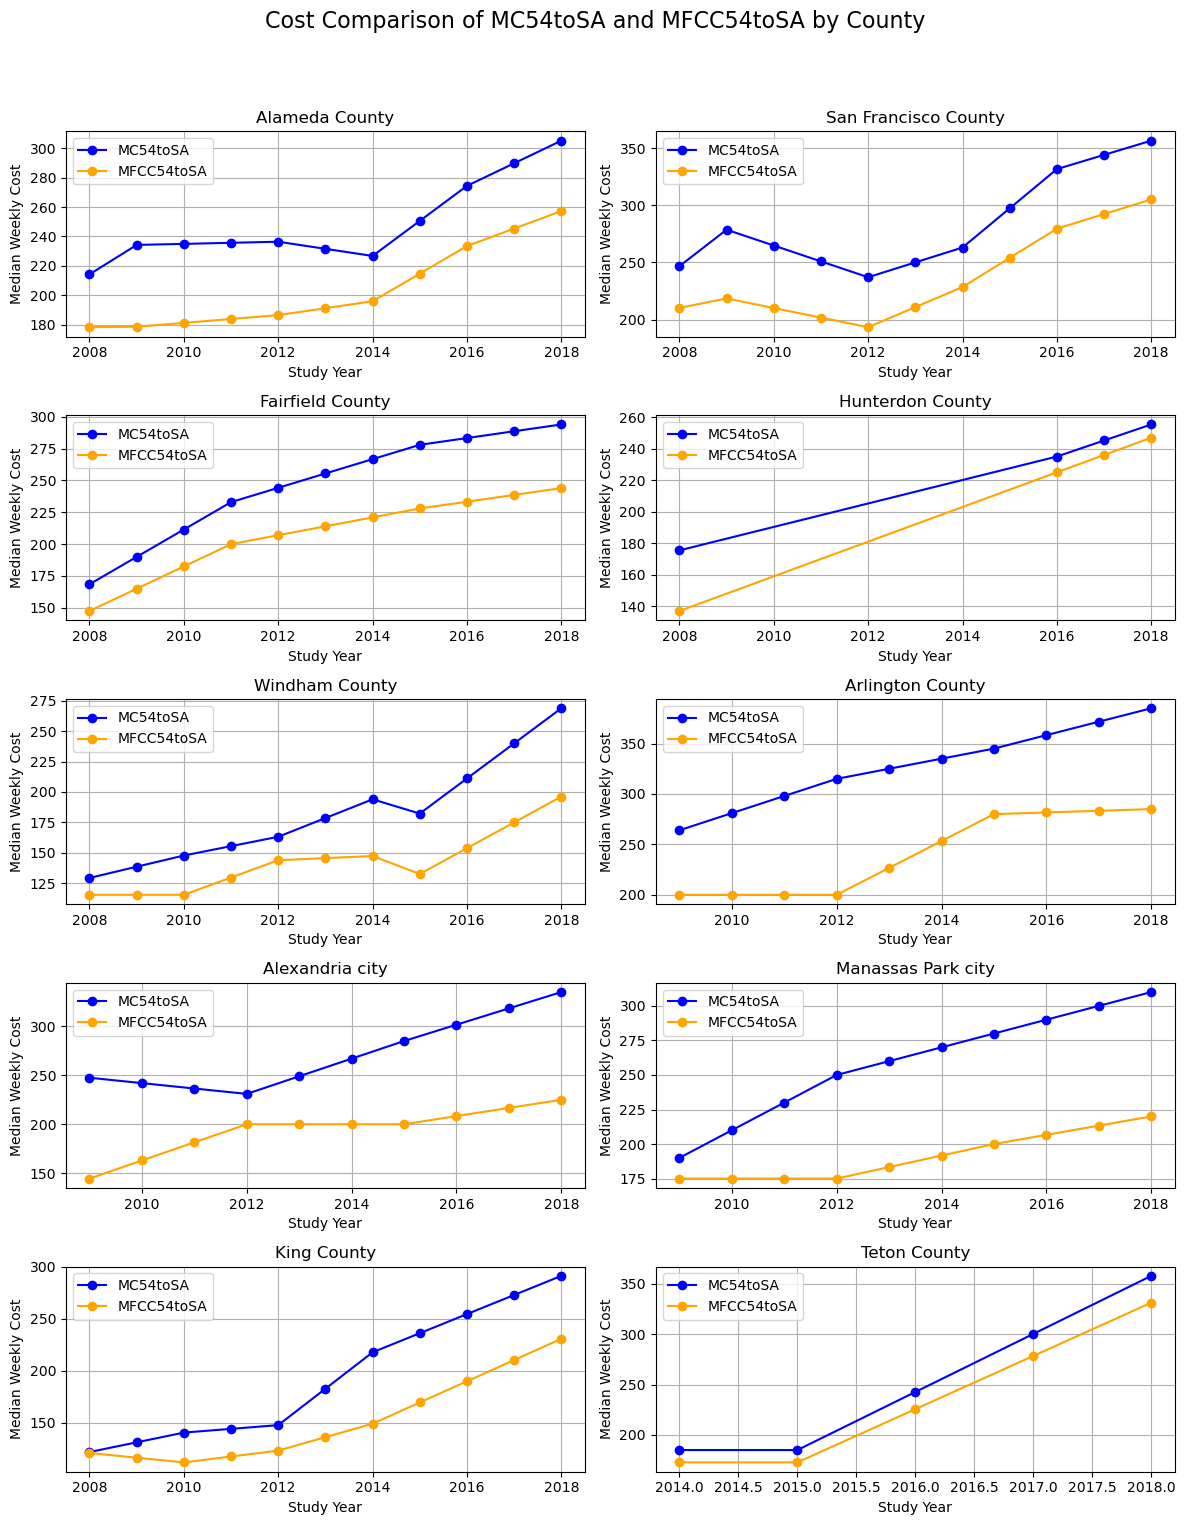

In [30]:
# Define the pair to plot
pair_to_plot = ('MC54toSA', 'MFCC54toSA')

# Get unique counties
counties = tc_weekly_cost['County_Name'].unique()

# Create the plot grid with 2 columns and adjust figsize for larger height
num_counties = len(counties)
fig, axes = plt.subplots(nrows=(num_counties + 1) // 2, ncols=2, figsize=(12, 16))
fig.suptitle(f'Cost Comparison of {pair_to_plot[0]} and {pair_to_plot[1]} by County', fontsize=16)

for i, county in enumerate(counties):
    # Filter data for the specific county
    df_county = tc_weekly_cost[tc_weekly_cost['County_Name'] == county]

    row = i // 2
    col = i % 2

    axes[row, col].plot(df_county['StudyYear'], df_county[pair_to_plot[0]], marker='o', label=pair_to_plot[0], color='blue')
    axes[row, col].plot(df_county['StudyYear'], df_county[pair_to_plot[1]], marker='o', label=pair_to_plot[1], color='orange')

    axes[row, col].set_title(county)
    axes[row, col].set_xlabel('Study Year')
    axes[row, col].set_ylabel('Median Weekly Cost')
    axes[row, col].grid(True)
    axes[row, col].legend()

# Hide any empty subplots (if the number of counties is not a multiple of 2)
for j in range(num_counties, 2 * ((num_counties + 1) // 2)):
    axes[j // 2, j % 2].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure as a PNG image
plt.savefig('MC54toSAvMFCC54toSA.png', format='png')

# Show plot
plt.show()

# MCSA vs. MFCCSA

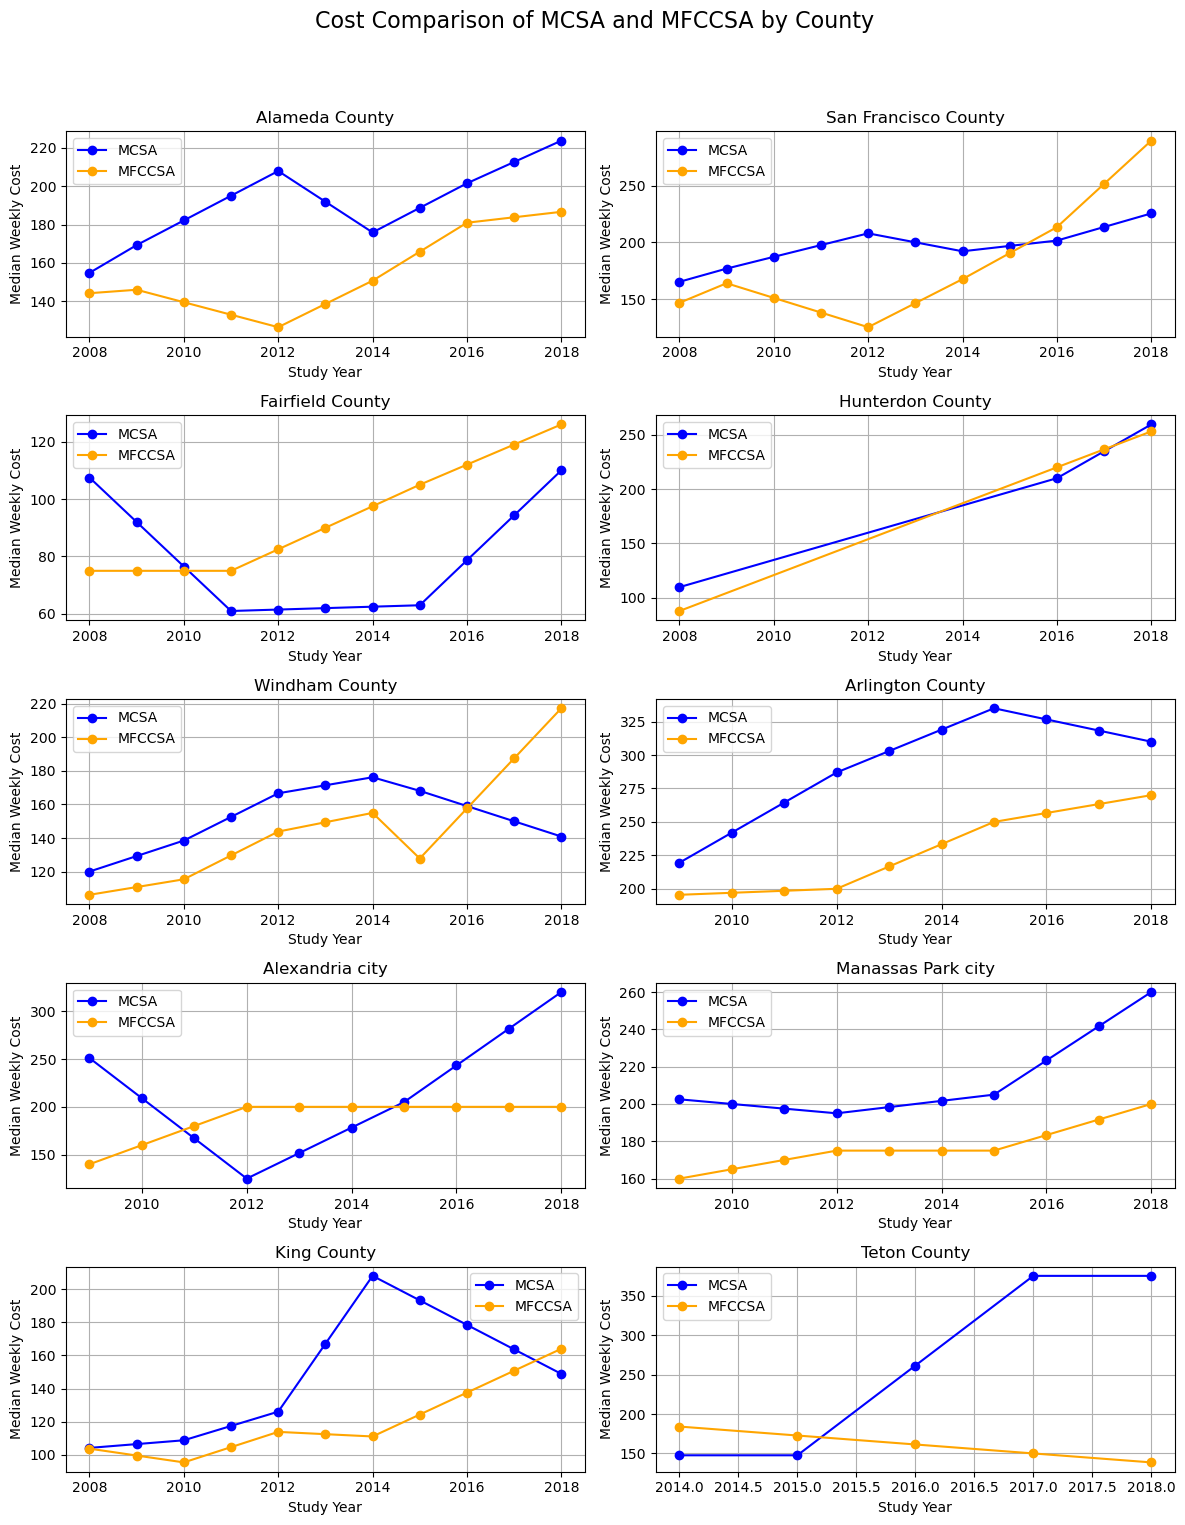

In [31]:
# Define the pair to plot
pair_to_plot = ('MCSA', 'MFCCSA')

# Get unique counties
counties = tc_weekly_cost['County_Name'].unique()

# Create the plot grid with 2 columns and adjust figsize for larger height
num_counties = len(counties)
fig, axes = plt.subplots(nrows=(num_counties + 1) // 2, ncols=2, figsize=(12, 16))
fig.suptitle(f'Cost Comparison of {pair_to_plot[0]} and {pair_to_plot[1]} by County', fontsize=16)

for i, county in enumerate(counties):
    # Filter data for the specific county
    df_county = tc_weekly_cost[tc_weekly_cost['County_Name'] == county]

    row = i // 2
    col = i % 2

    axes[row, col].plot(df_county['StudyYear'], df_county[pair_to_plot[0]], marker='o', label=pair_to_plot[0], color='blue')
    axes[row, col].plot(df_county['StudyYear'], df_county[pair_to_plot[1]], marker='o', label=pair_to_plot[1], color='orange')

    axes[row, col].set_title(county)
    axes[row, col].set_xlabel('Study Year')
    axes[row, col].set_ylabel('Median Weekly Cost')
    axes[row, col].grid(True)
    axes[row, col].legend()

# Hide any empty subplots (if the number of counties is not a multiple of 2)
for j in range(num_counties, 2 * ((num_counties + 1) // 2)):
    axes[j // 2, j % 2].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure as a PNG image
plt.savefig('MCSAvMFCCSA.png', format='png')

# Show plot
plt.show()

# Demographic Correlation

Fairfield County

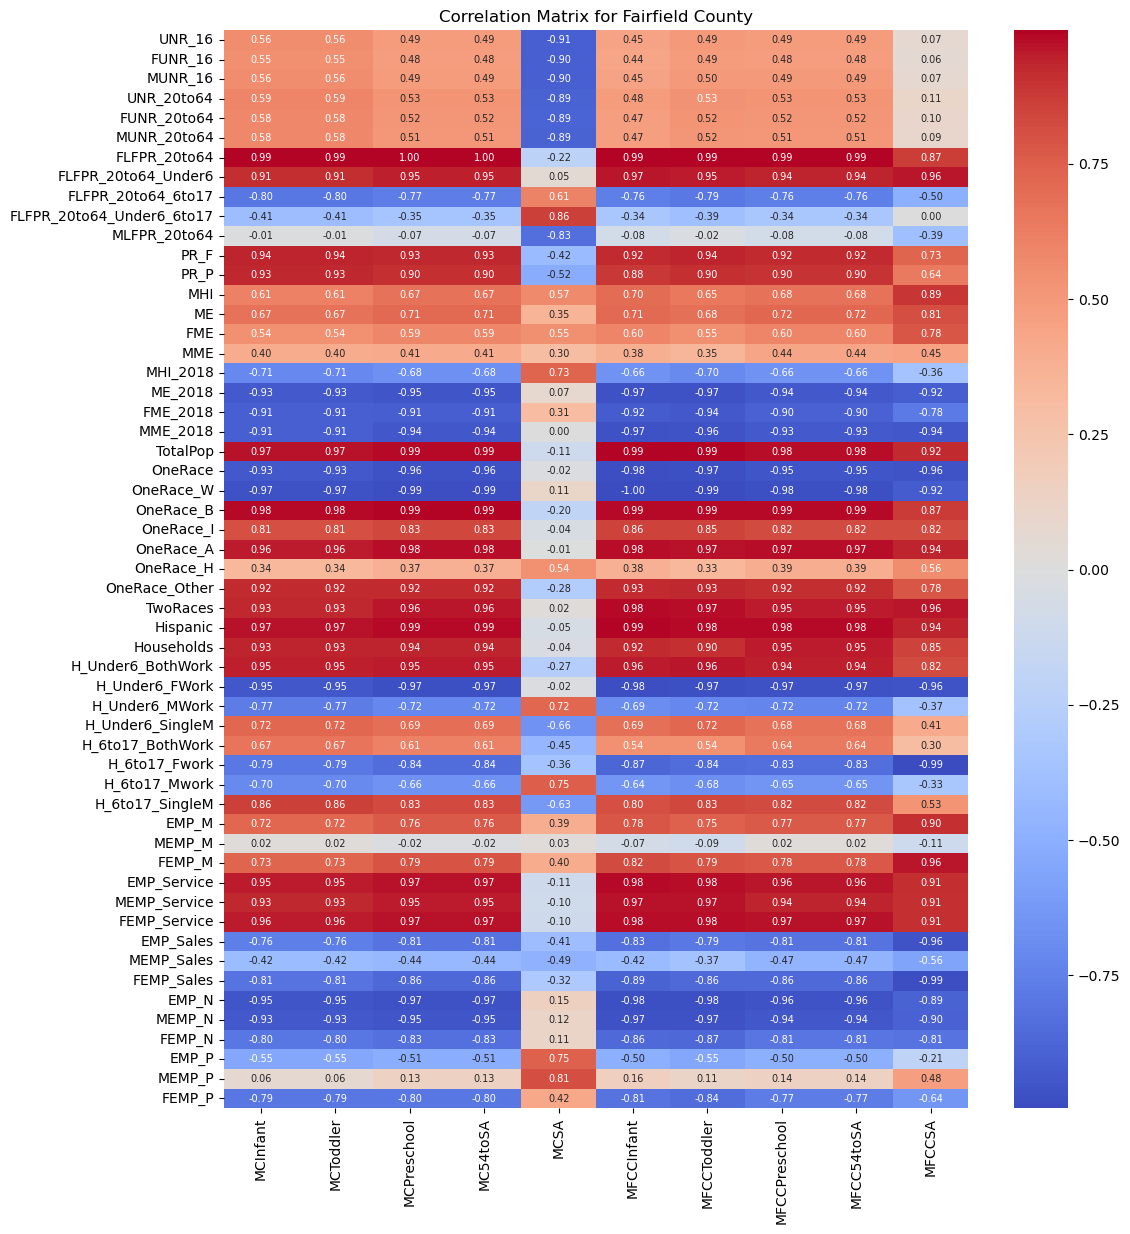

In [32]:
# Filter for Fairfield County only
county_name = 'Fairfield County'
county_df = top_counties[top_counties['County_Name'] == county_name]

# Select only numeric columns for correlation
numeric_df = county_df.select_dtypes(include=['number'])

# Calculate correlations for all numerical columns
correlation_matrix = numeric_df.corr()

# Specify target columns
target_columns = ['MCInfant', 'MCToddler', 'MCPreschool', 'MC54toSA', 'MCSA', 
                  'MFCCInfant', 'MFCCToddler', 'MFCCPreschool', 'MFCC54toSA', 'MFCCSA']

# Remove unnecessary columns from the y-axis of the heatmap
drop_columns = ['County_FIPS_Code', 'StudyYear', 'MCInfant', 'MCToddler', 'MCPreschool', 
                'MC54toSA', 'MCSA', 'MFCCInfant', 'MFCCToddler', 'MFCCPreschool', 
                'MFCC54toSA', 'MFCCSA']
# Drop rows for drop_columns
correlation_matrix_filtered = correlation_matrix.drop(drop_columns, axis=0, errors='ignore')

# Filter correlation matrix to show only targeted columns
filtered_corr = correlation_matrix_filtered[target_columns]

# Plot the heatmap
plt.figure(figsize=(12, 14))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 7})
plt.title(f'Correlation Matrix for {county_name}')
plt.savefig('fairfield.png', format='png')
plt.show()

San Francisco County

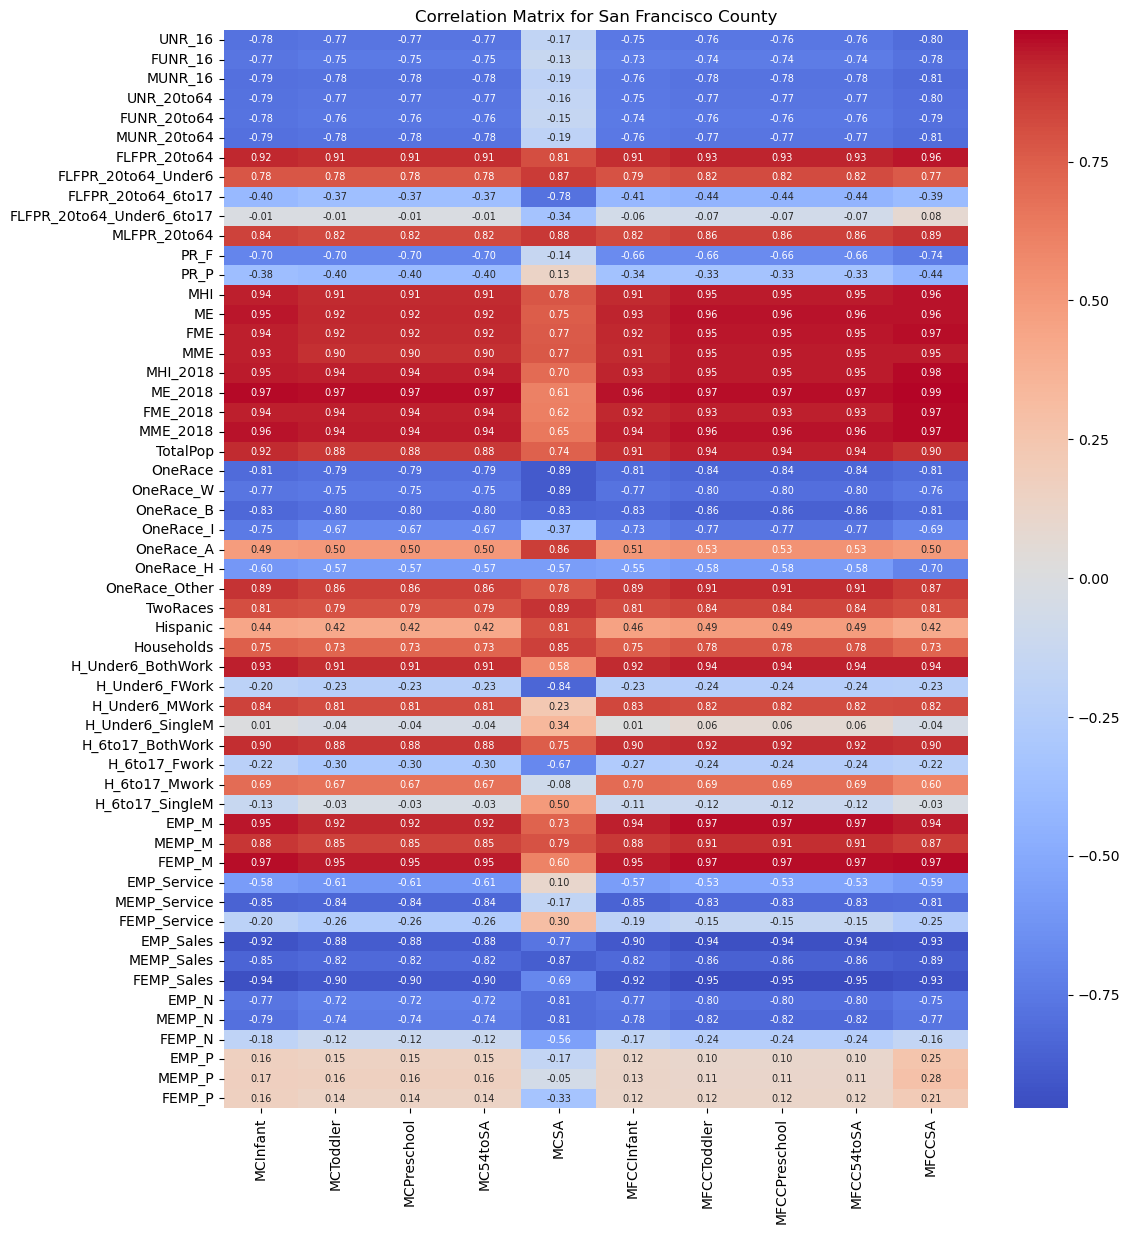

In [33]:
# Filter for San Francisco County only
county_name = 'San Francisco County'
county_df = top_counties[top_counties['County_Name'] == county_name]

# Select only numeric columns for correlation
numeric_df = county_df.select_dtypes(include=['number'])

# Calculate correlations for all numerical columns
correlation_matrix = numeric_df.corr()

# Specify target columns
target_columns = ['MCInfant', 'MCToddler', 'MCPreschool', 'MC54toSA', 'MCSA', 
                  'MFCCInfant', 'MFCCToddler', 'MFCCPreschool', 'MFCC54toSA', 'MFCCSA']

# Remove unnecessary columns from the y-axis of the heatmap
drop_columns = ['County_FIPS_Code', 'StudyYear', 'MCInfant', 'MCToddler', 'MCPreschool', 
                'MC54toSA', 'MCSA', 'MFCCInfant', 'MFCCToddler', 'MFCCPreschool', 
                'MFCC54toSA', 'MFCCSA']
# Drop rows for drop_columns
correlation_matrix_filtered = correlation_matrix.drop(drop_columns, axis=0, errors='ignore')

# Filter correlation matrix to show only targeted columns
filtered_corr = correlation_matrix_filtered[target_columns]

# Plot the heatmap
plt.figure(figsize=(12, 14))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 7})
plt.title(f'Correlation Matrix for {county_name}')
plt.savefig('sanfran.png', format='png')
plt.show()

King County

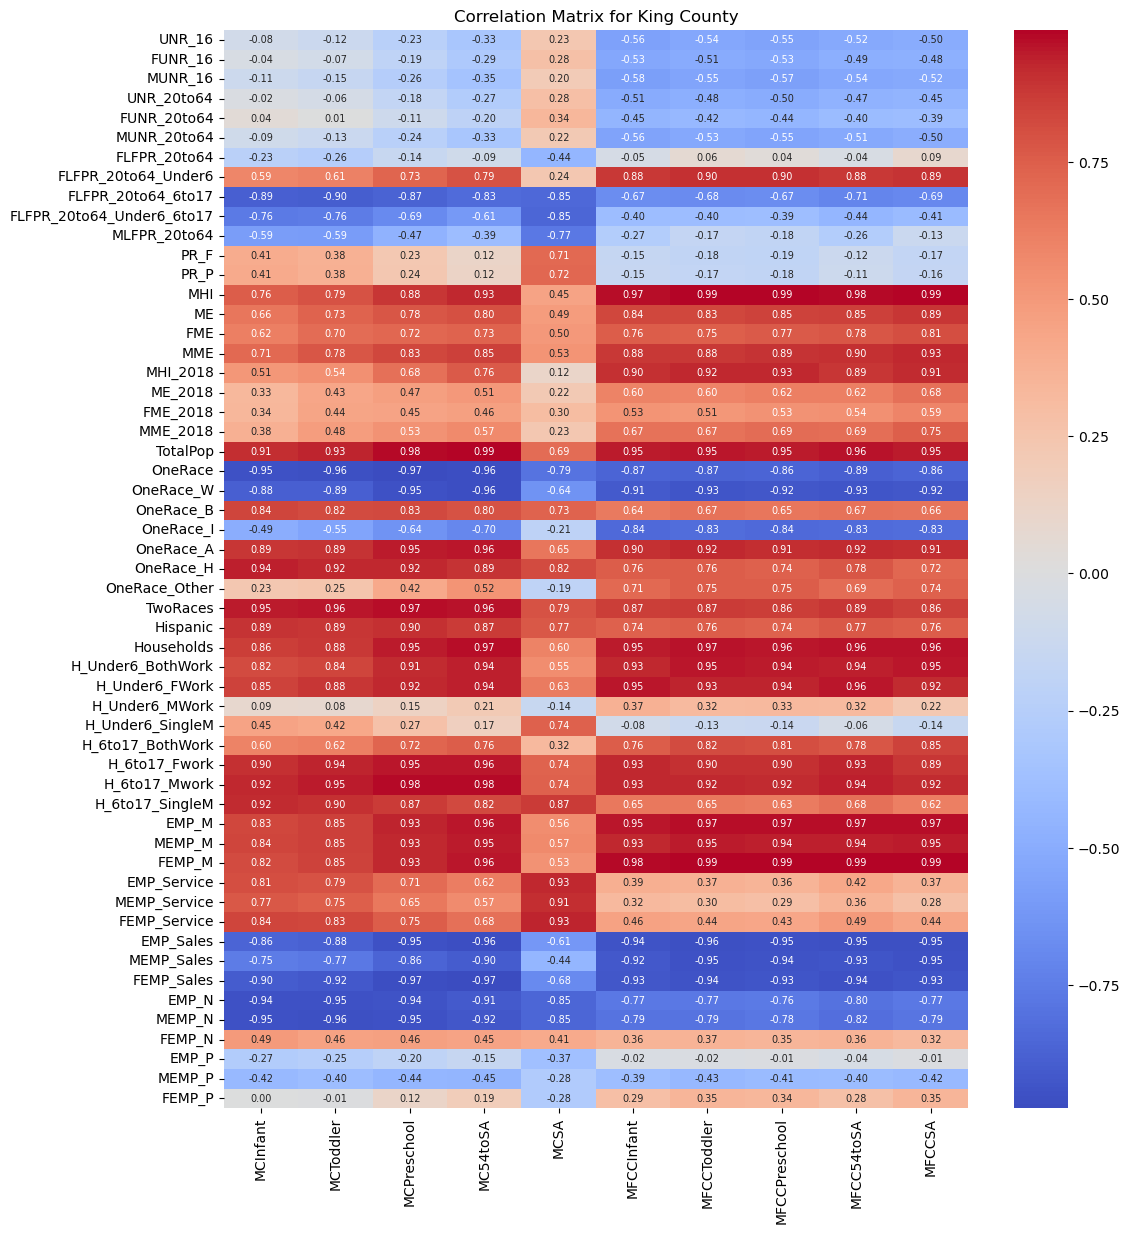

In [34]:
# Filter for King County only
county_name = 'King County'
county_df = top_counties[top_counties['County_Name'] == county_name]

# Select only numeric columns for correlation
numeric_df = county_df.select_dtypes(include=['number'])

# Calculate correlations for all numerical columns
correlation_matrix = numeric_df.corr()

# Specify target columns
target_columns = ['MCInfant', 'MCToddler', 'MCPreschool', 'MC54toSA', 'MCSA', 
                  'MFCCInfant', 'MFCCToddler', 'MFCCPreschool', 'MFCC54toSA', 'MFCCSA']

# Remove unnecessary columns from the y-axis of the heatmap
drop_columns = ['County_FIPS_Code', 'StudyYear', 'MCInfant', 'MCToddler', 'MCPreschool', 
                'MC54toSA', 'MCSA', 'MFCCInfant', 'MFCCToddler', 'MFCCPreschool', 
                'MFCC54toSA', 'MFCCSA']
# Drop rows for drop_columns
correlation_matrix_filtered = correlation_matrix.drop(drop_columns, axis=0, errors='ignore')

# Filter correlation matrix to show only targeted columns
filtered_corr = correlation_matrix_filtered[target_columns]

# Plot the heatmap
plt.figure(figsize=(12, 14))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 7})
plt.title(f'Correlation Matrix for {county_name}')
plt.savefig('king.png', format='png')
plt.show()

Alexandria City

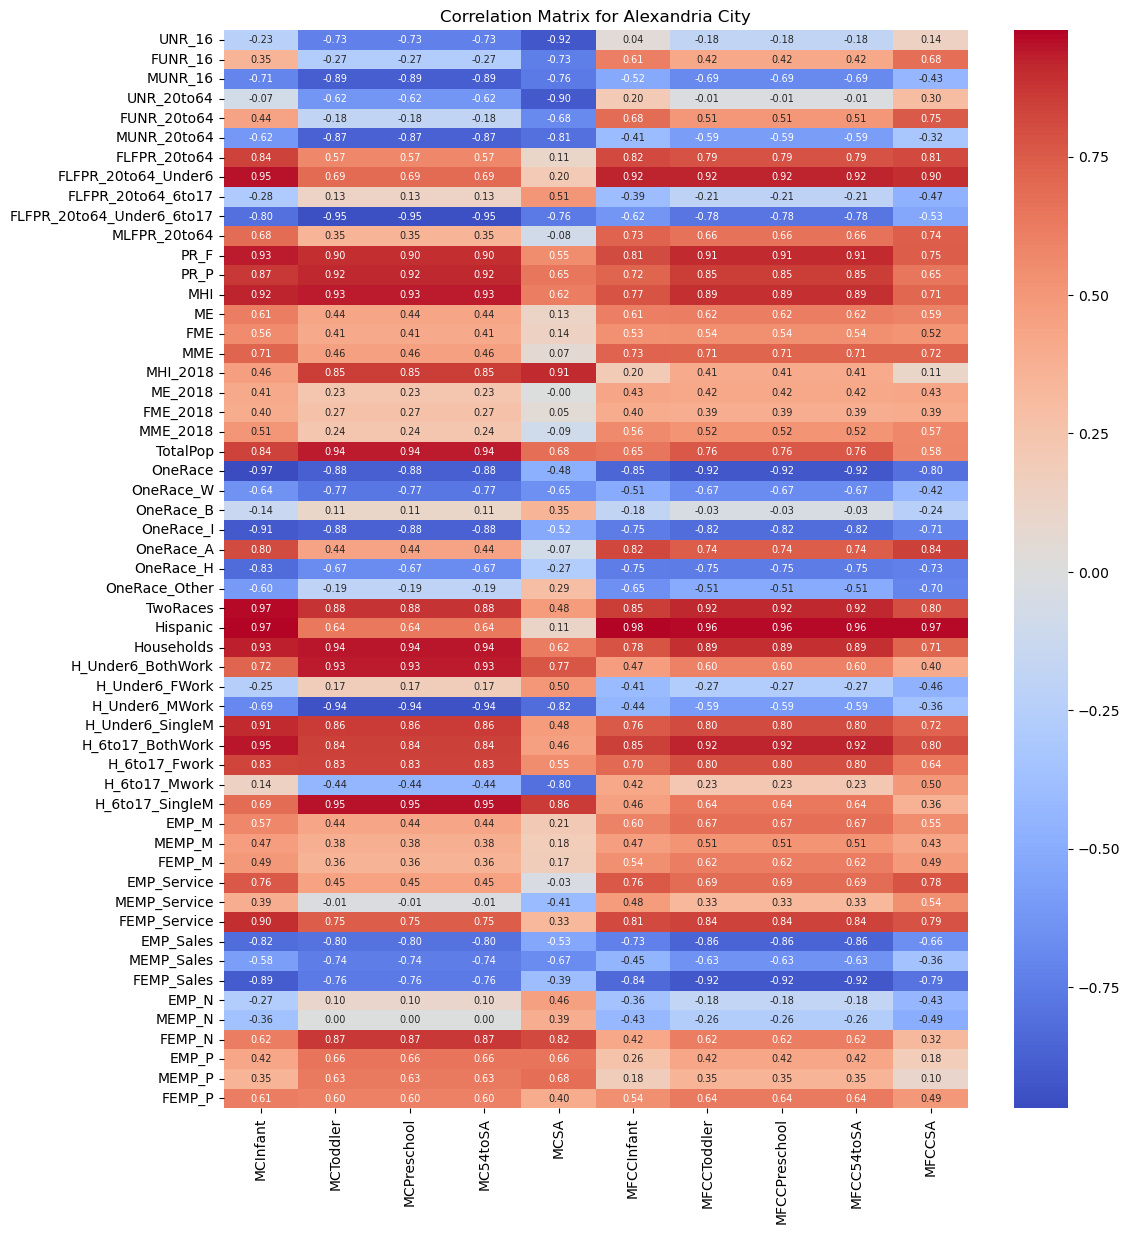

In [35]:
# Filter for Alexandria City only
county_name = 'Alexandria city'
county_df = top_counties[top_counties['County_Name'] == county_name]

# Select only numeric columns for correlation
numeric_df = county_df.select_dtypes(include=['number'])

# Calculate correlations for all numerical columns
correlation_matrix = numeric_df.corr()

# Specify target columns
target_columns = ['MCInfant', 'MCToddler', 'MCPreschool', 'MC54toSA', 'MCSA', 
                  'MFCCInfant', 'MFCCToddler', 'MFCCPreschool', 'MFCC54toSA', 'MFCCSA']

# Remove unnecessary columns from the y-axis of the heatmap
drop_columns = ['County_FIPS_Code', 'StudyYear', 'MCInfant', 'MCToddler', 'MCPreschool', 
                'MC54toSA', 'MCSA', 'MFCCInfant', 'MFCCToddler', 'MFCCPreschool', 
                'MFCC54toSA', 'MFCCSA']
# Drop rows for drop_columns
correlation_matrix_filtered = correlation_matrix.drop(drop_columns, axis=0, errors='ignore')

# Filter correlation matrix to show only targeted columns
filtered_corr = correlation_matrix_filtered[target_columns]

# Plot the heatmap
plt.figure(figsize=(12, 14))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 7})
plt.title('Correlation Matrix for Alexandria City')
plt.savefig('alexandria.png', format='png')
plt.show()

Alameda County

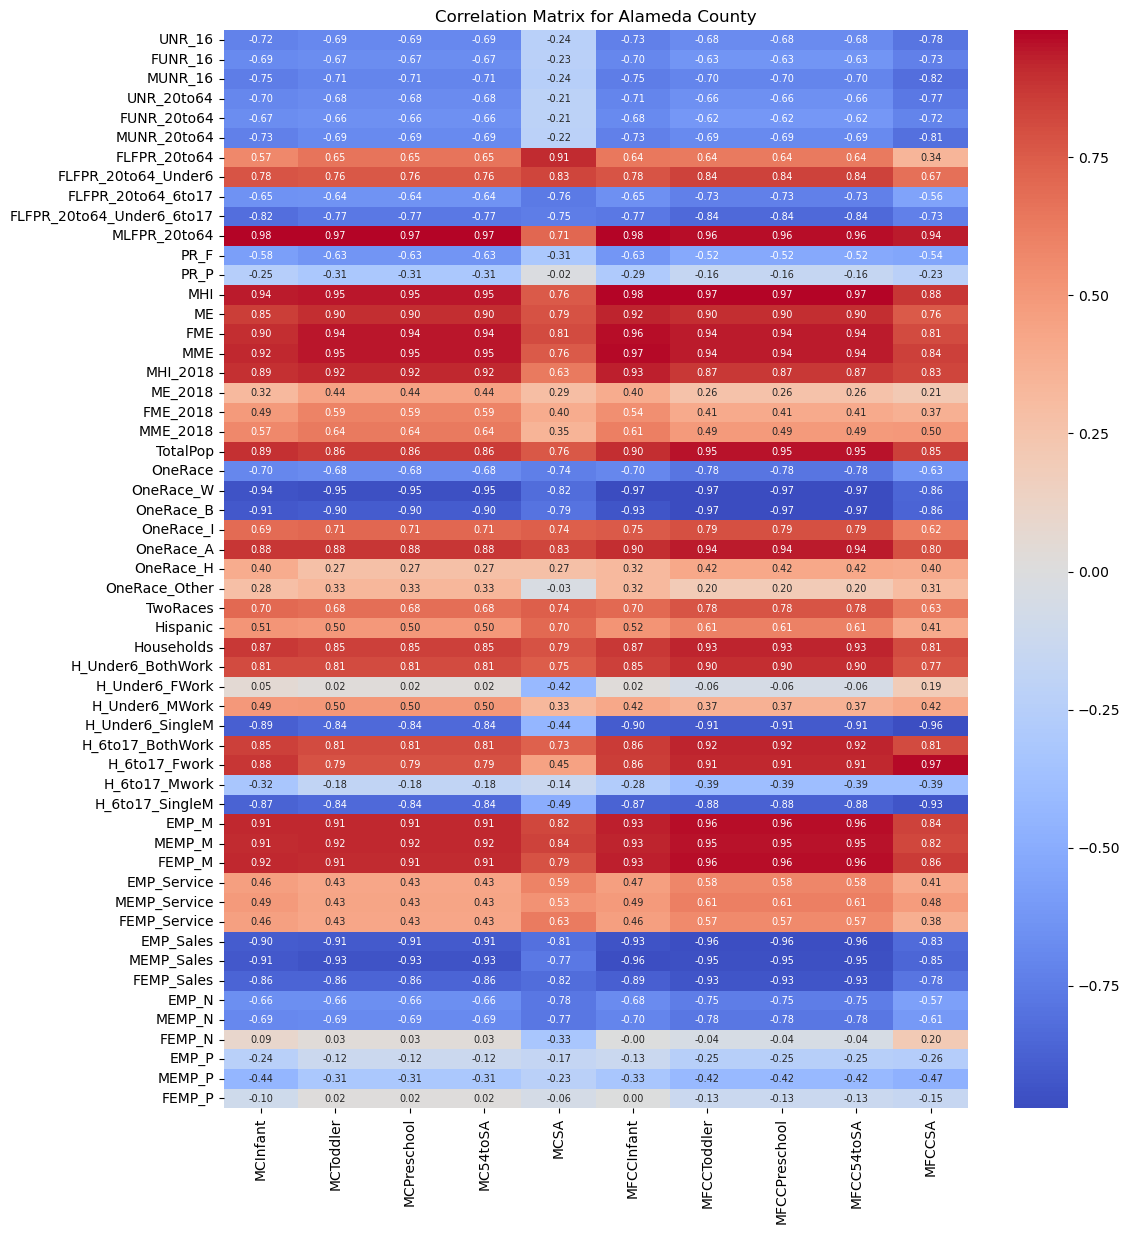

In [36]:
# Filter for Alameda County only
county_name = 'Alameda County'
county_df = top_counties[top_counties['County_Name'] == county_name]

# Select only numeric columns for correlation
numeric_df = county_df.select_dtypes(include=['number'])

# Calculate correlations for all numerical columns
correlation_matrix = numeric_df.corr()

# Specify target columns
target_columns = ['MCInfant', 'MCToddler', 'MCPreschool', 'MC54toSA', 'MCSA', 
                  'MFCCInfant', 'MFCCToddler', 'MFCCPreschool', 'MFCC54toSA', 'MFCCSA']

# Remove unnecessary columns from the y-axis of the heatmap
drop_columns = ['County_FIPS_Code', 'StudyYear', 'MCInfant', 'MCToddler', 'MCPreschool', 
                'MC54toSA', 'MCSA', 'MFCCInfant', 'MFCCToddler', 'MFCCPreschool', 
                'MFCC54toSA', 'MFCCSA']
# Drop rows for drop_columns
correlation_matrix_filtered = correlation_matrix.drop(drop_columns, axis=0, errors='ignore')

# Filter correlation matrix to show only targeted columns
filtered_corr = correlation_matrix_filtered[target_columns]

# Plot the heatmap
plt.figure(figsize=(12, 14))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 7})
plt.title(f'Correlation Matrix for {county_name}')
plt.savefig('alameda.png', format='png')
plt.show()

Interpretation of Correlation Coefficients
* Range: The values range from -1 to 1.
* 1: Perfect positive correlation. As one variable increases, the other variable also increases proportionally.
* -1: Perfect negative correlation. As one variable increases, the other variable decreases proportionally.
* 0: No correlation. Changes in one variable do not predict changes in the other.

Strength of Correlation
* 0.0 to 0.1: No correlation (or very weak correlation)
* 0.1 to 0.3: Weak positive correlation
* 0.3 to 0.5: Moderate positive correlation
* 0.5 to 0.7: Strong positive correlation
* 0.7 to 0.9: Very strong positive correlation
* 0.9 to 1.0: Perfect positive correlation
* -0.1 to -0.3: Weak negative correlation
* -0.3 to -0.5: Moderate negative correlation
* -0.5 to -0.7: Strong negative correlation
* -0.7 to -0.9: Very strong negative correlation
* -0.9 to -1.0: Perfect negative correlation

In [37]:
# Save the DataFrame to an Excel file
tc_weekly_cost.to_excel('tc_weekly_cost.xlsx', index=False, engine='openpyxl')

# Code for plots to include in summary document

## Infant

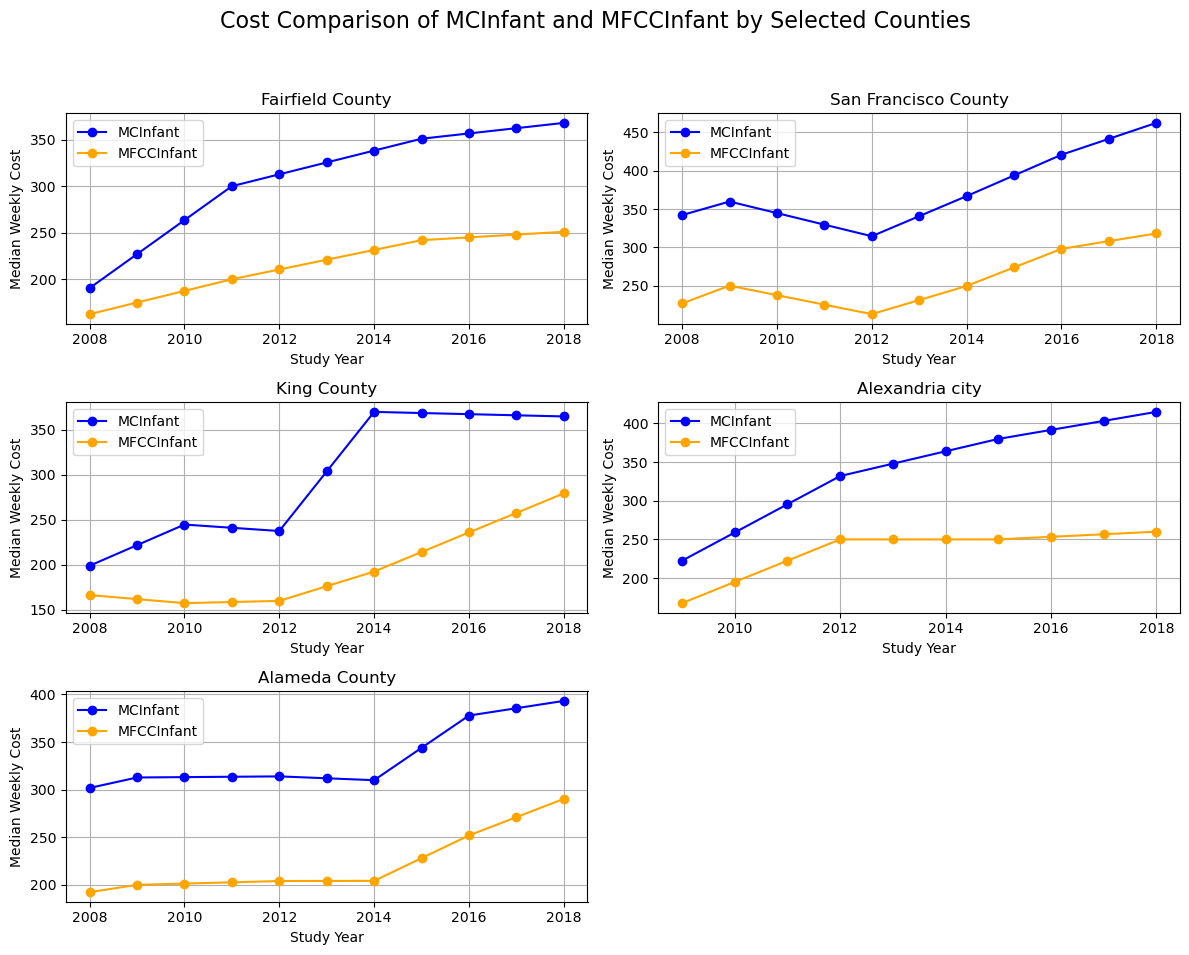

In [38]:
# Define the pair to plot
pair_to_plot = ('MCInfant', 'MFCCInfant')

# Specify the counties to include in the plot
selected_counties = ['Fairfield County', 'San Francisco County', 'King County', 'Alexandria city', 'Alameda County']

# Filter data to only include selected counties
filtered_data = tc_weekly_cost[tc_weekly_cost['County_Name'].isin(selected_counties)]

# Create the plot grid with 2 columns and adjust figsize for the number of selected counties
num_selected_counties = len(selected_counties)
fig, axes = plt.subplots(nrows=(num_selected_counties + 1) // 2, ncols=2, figsize=(12, 10))
fig.suptitle(f'Cost Comparison of {pair_to_plot[0]} and {pair_to_plot[1]} by Selected Counties', fontsize=16)

for i, county in enumerate(selected_counties):
    # Filter data for the specific county
    df_county = filtered_data[filtered_data['County_Name'] == county]

    row = i // 2
    col = i % 2

    axes[row, col].plot(df_county['StudyYear'], df_county[pair_to_plot[0]], marker='o', label=pair_to_plot[0], color='blue')
    axes[row, col].plot(df_county['StudyYear'], df_county[pair_to_plot[1]], marker='o', label=pair_to_plot[1], color='orange')

    axes[row, col].set_title(county)
    axes[row, col].set_xlabel('Study Year')
    axes[row, col].set_ylabel('Median Weekly Cost')
    axes[row, col].grid(True)
    axes[row, col].legend()

# Hide any empty subplots (if the number of counties is not a multiple of 2)
for j in range(num_selected_counties, 2 * ((num_selected_counties + 1) // 2)):
    axes[j // 2, j % 2].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure as a PNG image
plt.savefig('SelectedCounties_MCInfantvMFCCInfant.png', format='png')

# Show plot
plt.show()

## Toddler

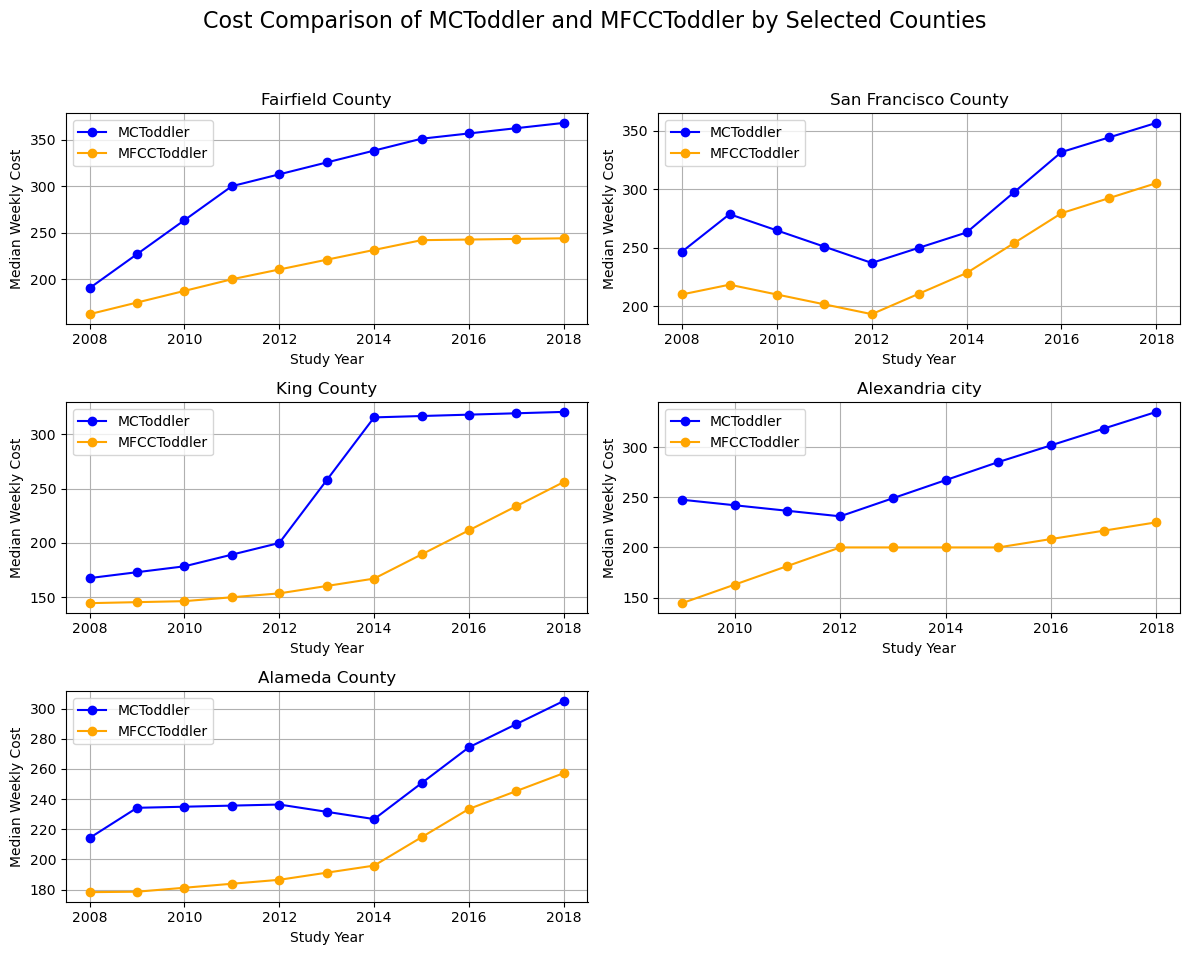

In [39]:
# Define the pair to plot
pair_to_plot = ('MCToddler', 'MFCCToddler')

# Specify the counties to include in the plot
selected_counties = ['Fairfield County', 'San Francisco County', 'King County', 'Alexandria city', 'Alameda County']

# Filter data to only include selected counties
filtered_data = tc_weekly_cost[tc_weekly_cost['County_Name'].isin(selected_counties)]

# Create the plot grid with 2 columns and adjust figsize for the number of selected counties
num_selected_counties = len(selected_counties)
fig, axes = plt.subplots(nrows=(num_selected_counties + 1) // 2, ncols=2, figsize=(12, 10))
fig.suptitle(f'Cost Comparison of {pair_to_plot[0]} and {pair_to_plot[1]} by Selected Counties', fontsize=16)

for i, county in enumerate(selected_counties):
    # Filter data for the specific county
    df_county = filtered_data[filtered_data['County_Name'] == county]

    row = i // 2
    col = i % 2

    axes[row, col].plot(df_county['StudyYear'], df_county[pair_to_plot[0]], marker='o', label=pair_to_plot[0], color='blue')
    axes[row, col].plot(df_county['StudyYear'], df_county[pair_to_plot[1]], marker='o', label=pair_to_plot[1], color='orange')

    axes[row, col].set_title(county)
    axes[row, col].set_xlabel('Study Year')
    axes[row, col].set_ylabel('Median Weekly Cost')
    axes[row, col].grid(True)
    axes[row, col].legend()

# Hide any empty subplots (if the number of counties is not a multiple of 2)
for j in range(num_selected_counties, 2 * ((num_selected_counties + 1) // 2)):
    axes[j // 2, j % 2].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure as a PNG image
plt.savefig('SelectedCounties_MCToddlervMFCCToddler.png', format='png')

# Show plot
plt.show()

## Preschool

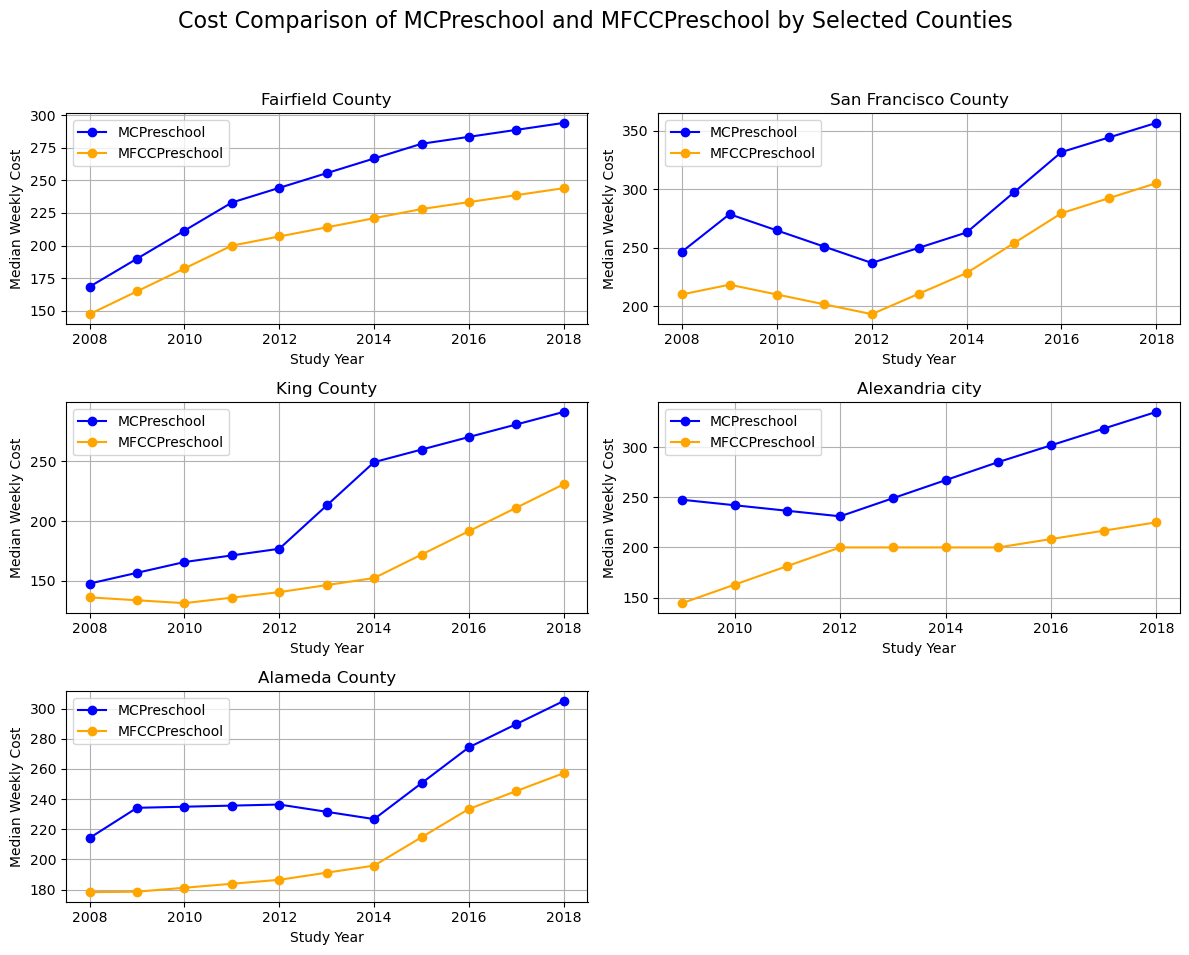

In [40]:
# Define the pair to plot
pair_to_plot = ('MCPreschool', 'MFCCPreschool')

# Specify the counties to include in the plot
selected_counties = ['Fairfield County', 'San Francisco County', 'King County', 'Alexandria city', 'Alameda County']

# Filter data to only include selected counties
filtered_data = tc_weekly_cost[tc_weekly_cost['County_Name'].isin(selected_counties)]

# Create the plot grid with 2 columns and adjust figsize for the number of selected counties
num_selected_counties = len(selected_counties)
fig, axes = plt.subplots(nrows=(num_selected_counties + 1) // 2, ncols=2, figsize=(12, 10))
fig.suptitle(f'Cost Comparison of {pair_to_plot[0]} and {pair_to_plot[1]} by Selected Counties', fontsize=16)

for i, county in enumerate(selected_counties):
    # Filter data for the specific county
    df_county = filtered_data[filtered_data['County_Name'] == county]

    row = i // 2
    col = i % 2

    axes[row, col].plot(df_county['StudyYear'], df_county[pair_to_plot[0]], marker='o', label=pair_to_plot[0], color='blue')
    axes[row, col].plot(df_county['StudyYear'], df_county[pair_to_plot[1]], marker='o', label=pair_to_plot[1], color='orange')

    axes[row, col].set_title(county)
    axes[row, col].set_xlabel('Study Year')
    axes[row, col].set_ylabel('Median Weekly Cost')
    axes[row, col].grid(True)
    axes[row, col].legend()

# Hide any empty subplots (if the number of counties is not a multiple of 2)
for j in range(num_selected_counties, 2 * ((num_selected_counties + 1) // 2)):
    axes[j // 2, j % 2].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure as a PNG image
plt.savefig('SelectedCounties_MCPreschoolvMFCCPreschool.png', format='png')

# Show plot
plt.show()

## 54 Months to School Age

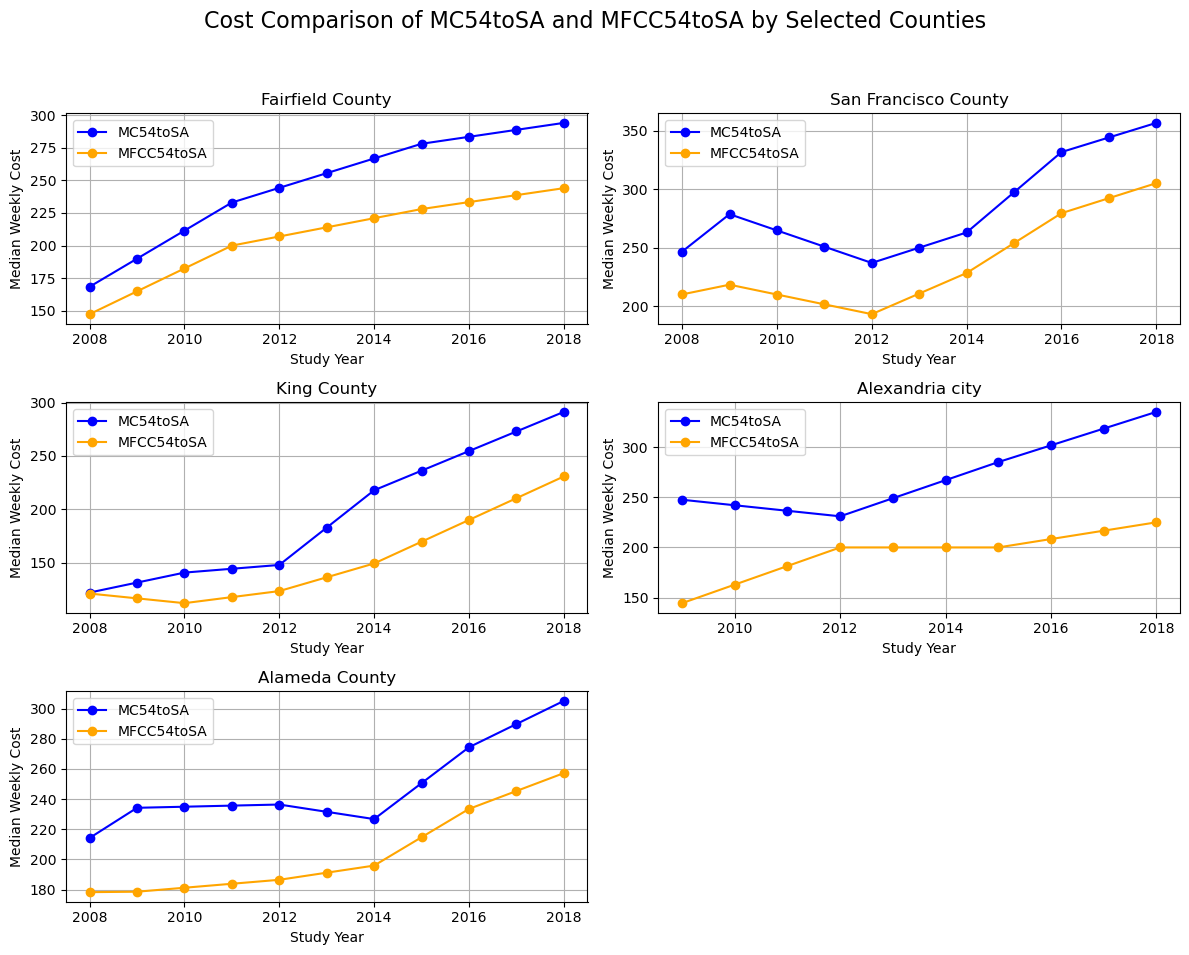

In [41]:
# Define the pair to plot
pair_to_plot = ('MC54toSA', 'MFCC54toSA')

# Specify the counties to include in the plot
selected_counties = ['Fairfield County', 'San Francisco County', 'King County', 'Alexandria city', 'Alameda County']

# Filter data to only include selected counties
filtered_data = tc_weekly_cost[tc_weekly_cost['County_Name'].isin(selected_counties)]

# Create the plot grid with 2 columns and adjust figsize for the number of selected counties
num_selected_counties = len(selected_counties)
fig, axes = plt.subplots(nrows=(num_selected_counties + 1) // 2, ncols=2, figsize=(12, 10))
fig.suptitle(f'Cost Comparison of {pair_to_plot[0]} and {pair_to_plot[1]} by Selected Counties', fontsize=16)

for i, county in enumerate(selected_counties):
    # Filter data for the specific county
    df_county = filtered_data[filtered_data['County_Name'] == county]

    row = i // 2
    col = i % 2

    axes[row, col].plot(df_county['StudyYear'], df_county[pair_to_plot[0]], marker='o', label=pair_to_plot[0], color='blue')
    axes[row, col].plot(df_county['StudyYear'], df_county[pair_to_plot[1]], marker='o', label=pair_to_plot[1], color='orange')

    axes[row, col].set_title(county)
    axes[row, col].set_xlabel('Study Year')
    axes[row, col].set_ylabel('Median Weekly Cost')
    axes[row, col].grid(True)
    axes[row, col].legend()

# Hide any empty subplots (if the number of counties is not a multiple of 2)
for j in range(num_selected_counties, 2 * ((num_selected_counties + 1) // 2)):
    axes[j // 2, j % 2].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure as a PNG image
plt.savefig('SelectedCounties_MC54toSAvMFCC54toSA.png', format='png')

# Show plot
plt.show()

## School Age

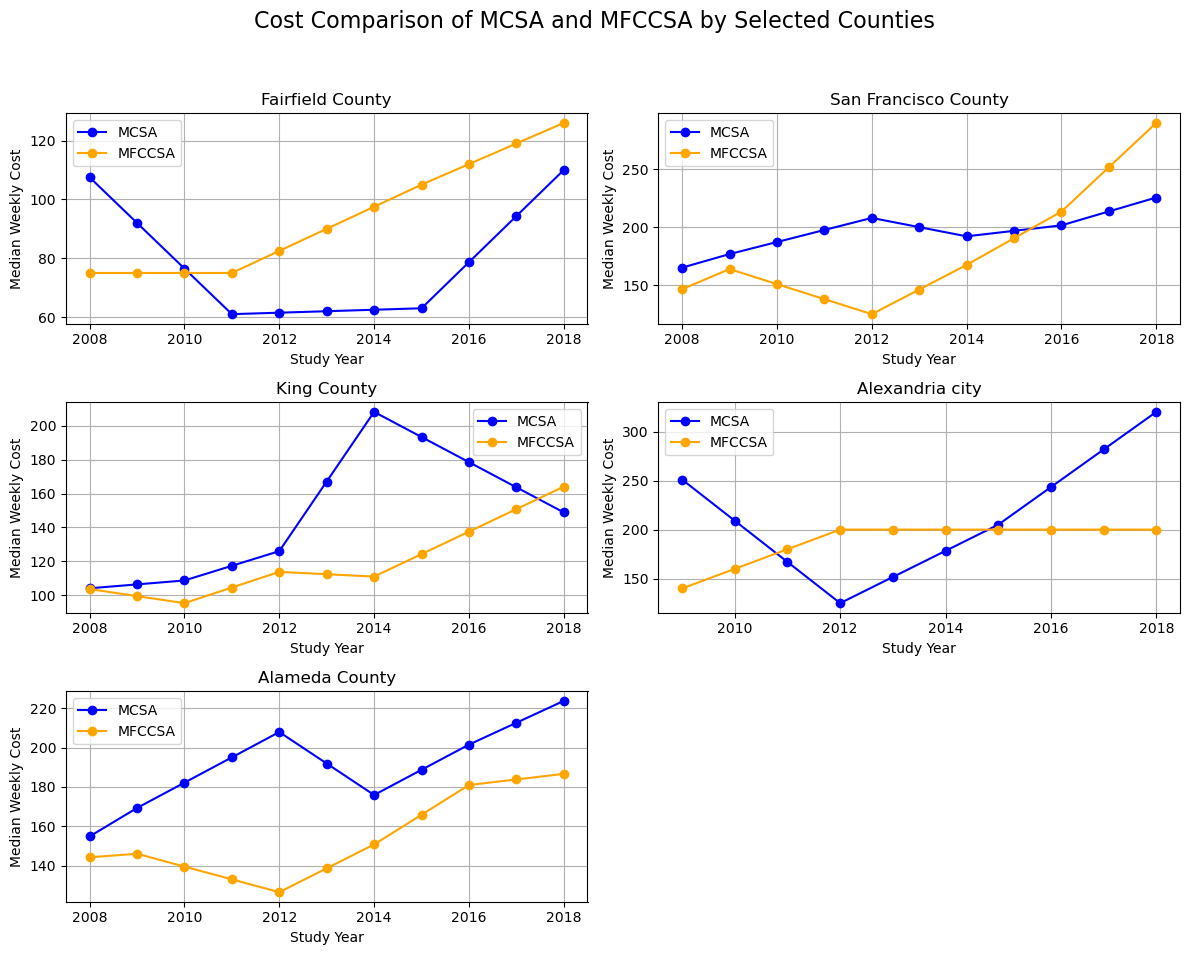

In [42]:
# Define the pair to plot
pair_to_plot = ('MCSA', 'MFCCSA')

# Specify the counties to include in the plot
selected_counties = ['Fairfield County', 'San Francisco County', 'King County', 'Alexandria city', 'Alameda County']

# Filter data to only include selected counties
filtered_data = tc_weekly_cost[tc_weekly_cost['County_Name'].isin(selected_counties)]

# Create the plot grid with 2 columns and adjust figsize for the number of selected counties
num_selected_counties = len(selected_counties)
fig, axes = plt.subplots(nrows=(num_selected_counties + 1) // 2, ncols=2, figsize=(12, 10))
fig.suptitle(f'Cost Comparison of {pair_to_plot[0]} and {pair_to_plot[1]} by Selected Counties', fontsize=16)

for i, county in enumerate(selected_counties):
    # Filter data for the specific county
    df_county = filtered_data[filtered_data['County_Name'] == county]

    row = i // 2
    col = i % 2

    axes[row, col].plot(df_county['StudyYear'], df_county[pair_to_plot[0]], marker='o', label=pair_to_plot[0], color='blue')
    axes[row, col].plot(df_county['StudyYear'], df_county[pair_to_plot[1]], marker='o', label=pair_to_plot[1], color='orange')

    axes[row, col].set_title(county)
    axes[row, col].set_xlabel('Study Year')
    axes[row, col].set_ylabel('Median Weekly Cost')
    axes[row, col].grid(True)
    axes[row, col].legend()

# Hide any empty subplots (if the number of counties is not a multiple of 2)
for j in range(num_selected_counties, 2 * ((num_selected_counties + 1) // 2)):
    axes[j // 2, j % 2].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure as a PNG image
plt.savefig('SelectedCounties_MCSAvMFCCSA.png', format='png')

# Show plot
plt.show()